# **Bank Additional** 🏦

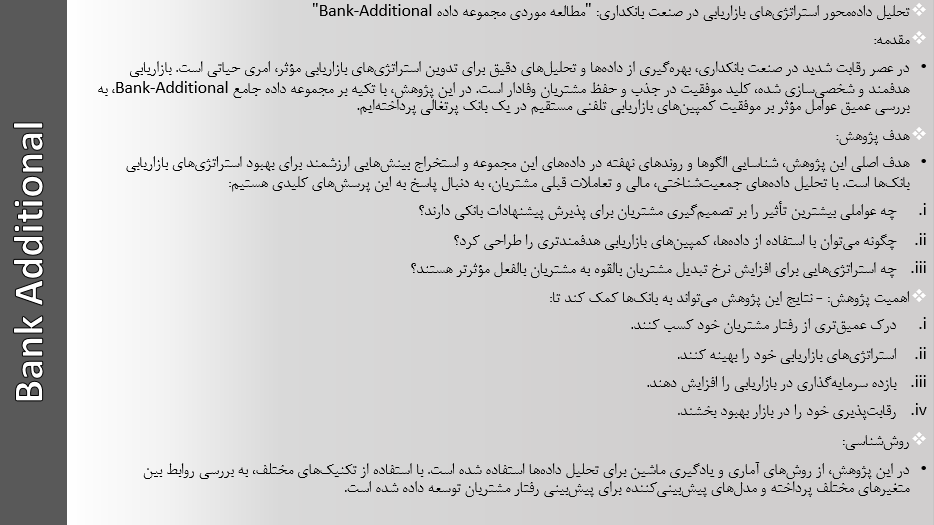

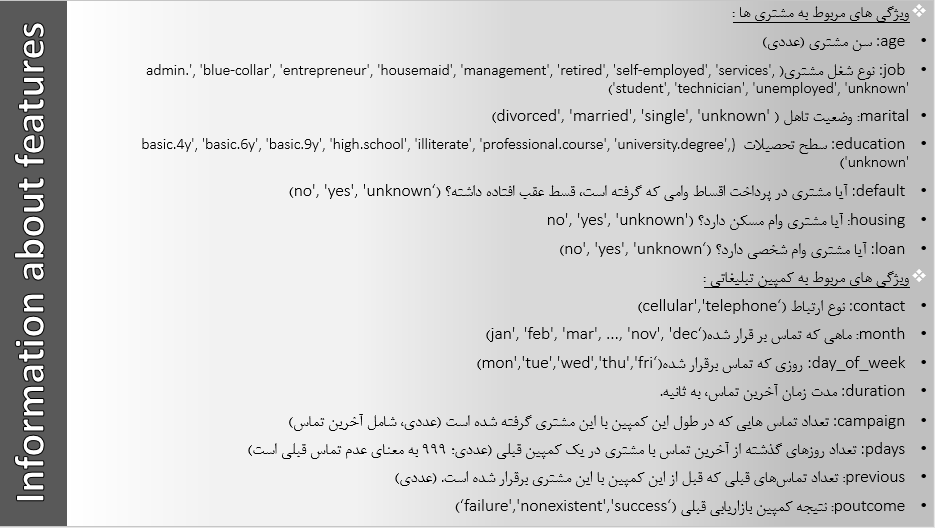

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Library** 📚

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# **1) Dataset** 📖

#### **1.1) read dataset**

In [72]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bank Additional/bank-additional.csv')
display(df.head())
df.shape

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


(11162, 17)

#### **1.2) basic information**

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [74]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [75]:
df.select_dtypes(include='int64')

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0
11158,39,733,16,83,4,-1,0
11159,32,29,19,156,2,-1,0
11160,43,0,8,9,2,172,5


In [76]:
df.select_dtypes(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes
...,...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,primary,no,yes,no,cellular,apr,unknown,no
11158,services,married,secondary,no,no,no,unknown,jun,unknown,no
11159,technician,single,secondary,no,no,no,cellular,aug,unknown,no
11160,technician,married,secondary,no,no,yes,cellular,may,failure,no


In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


#### **1.3) Duplicate**

In [78]:
df.duplicated().sum()

0

#### **1.4) find Missing values**

In [79]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [80]:
pd.DataFrame(df.isin(['unknown']).sum())

,0
age,0
job,70
marital,0
education,497
default,0
balance,0
housing,0
loan,0
contact,2346
day,0


In [81]:
df = df.replace('unknown', np.NAN)

In [82]:
df.isna().sum()

,0
age,0
job,70
marital,0
education,497
default,0
balance,0
housing,0
loan,0
contact,2346
day,0


In [83]:
df.drop(['poutcome'], axis=1, inplace=True)
df.dropna(inplace=True)
df.shape

(8393, 16)

In [84]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


# **2) Exploratory Data Analysis & Visualization🔎**

#### **EDA function**

In [85]:
# - matplotlib | seaborn
def EDA_num(DF, col, target, alpha_l=1.5, alpha_u=1.5, bins=50, basic_eda=True):
    """
  EDA for Numerical data

  This function performs Exploratory Data Analysis (EDA) on a numerical column in a pandas DataFrame.

  Args:
      DF (pandas.DataFrame): The DataFrame containing the data.

      col (str): The name of the numerical column to analyse.
            -col dtype(int or float)

      target (str): The name of the target column.
            -target dtype (int or float)

      basic_eda (bool, optional): Flag to control basic EDA output. Defaults to True.

  Returns:
      None
    """

    #   -Import libraries
    import seaborn as sns
    import matplotlib.pyplot as plt
    from scipy import stats
    import pandas as pd
    import numpy as np
    import warnings
    warnings.filterwarnings('ignore')

    #   -Basic EDA
    if basic_eda:
        print('Basic EDA:')
        display(DF[col].describe())
        print('-' * 100)
        display(DF[col].value_counts())
        print('-' * 100)
        print('Skewness:', round(DF[col].skew(), 2))
        print('Kurtosis:', round(DF[col].kurt(), 2))
        print('-' * 100)
        print('Number of Values:', DF[col].nunique())
        print('-' * 100)

    #   -Normality Test
    stat, p = stats.shapiro(DF[col])
    normality_result = 'Sample looks Gaussian (fail to reject H0)' if p > 0.05 else 'Sample does not look Gaussian (reject H0)'
    print(f'Is the data distribution normal?: {normality_result}')
    print('-' * 100)

    #   -Calculate Lower and Upper caps
    Q1, Q2, Q3 = DF[col].quantile([0.25, 0.5, 0.75])
    IQR = Q3 - Q1
    lower_cap, upper_cap = Q1 - (alpha_l * IQR), Q3 + (alpha_u * IQR)
    print('Univariate analysis Outlier value:', col, 'Than', target)

    #   -Plotting with Seaborn
    fig, axes = plt.subplots(1, 3, figsize=(17, 6))

    #   -Histogram
    sns.histplot(DF[col], bins=bins, color='skyblue', ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')

    #   -Box and Violin plots
    sns.boxplot(y=DF[col], ax=axes[1], boxprops=dict(facecolor='white', alpha=0.3),
                medianprops=dict(color='blue', linewidth=2),
                whiskerprops=dict(color='black'), capprops=dict(color='black'))
    sns.violinplot(y=DF[col], ax=axes[1], color='cornflowerblue', alpha=0.5)
    axes[1].set_title(f'Box and Violin plot of {col}')

    #   -Scatter plot and Outliers
    sns.scatterplot(x=DF[col], y=DF[target], ax=axes[2], label='Normal Data', color='darkblue')
    outliers = DF[(DF[col] < lower_cap) | (DF[col] > upper_cap)]
    sns.scatterplot(x=outliers[col], y=outliers[target], color='darkred', ax=axes[2], label='Outliers')

    #   -Set labels and vertical lines for caps
    axes[2].set_xlabel(col)
    axes[2].set_ylabel(target)
    axes[2].axvline(lower_cap, color='orange', linestyle='--', label='Lower Cap')
    axes[2].axvline(upper_cap, color='green', linestyle='--', label='Upper Cap')

    #   -Adding text for caps
    for cap, color in zip([lower_cap, upper_cap], ['orange', 'green']):
        axes[2].text(cap, DF[target].min(), f'{cap:.1f}', color=color, fontsize=12, ha='center', va='bottom')

    #   -Count outliers using the .isin() method
    outlier_count = outliers.shape[0]
    count_outliers_class_0 = DF[DF.index.isin(outliers.index) & (DF[target] == 0)].shape[0]
    count_outliers_class_1 = DF[DF.index.isin(outliers.index) & (DF[target] == 1)].shape[0]

    print(f"Number of outliers in Class 0: {count_outliers_class_0}")
    print(f"Number of outliers in Class 1: {count_outliers_class_1}")
    print(f"Number of outliers: {outlier_count}")

    #   -Title
    fig.suptitle(f'Features: {col}', fontsize=20)
    plt.tight_layout(rect=[0, 0.09, 1, 0.95])
    plt.show()

    return lower_cap, upper_cap

In [86]:
# - matplotlib | seaborn
def EDA_cat(DF, col, target=None, basic_eda=True):
    '''
    EDA for Categorical data

    This function performs Exploratory Data Analysis (EDA) on a categorical column in a pandas DataFrame.

    Args:
        DF (pandas.DataFrame): The DataFrame containing the data.
        col (str): The name of the categorical column to analyse.
            -col dtype (object)

        target (str): The name of the target column.
            -target dtype (int or float)

        basic_eda (bool, optional): Flag to control basic EDA output. Defaults to True.

    Returns:
        pd.DataFrame: A DataFrame containing the percentage of "yes" responses and normalized counts.
    '''

    #   -Import libraries
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    import warnings
    warnings.filterwarnings('ignore')

    #   -Basic EDA
    if basic_eda:
        print('Basic EDA:')
        display(DF[col].value_counts())
        print('-' * 100)
        print('Number of Unique Categories:', DF[col].nunique())
        print('-' * 100)

    # Summary Statistics if Target Provided
    summary = None
    if target and target in DF.columns:
        summary = DF.groupby(col)[target].agg(
            total_customers='count',
            accepted_customers='sum',
            rejected_customers=lambda x: (x == 0).sum()
        ).reset_index()
        summary['acceptance_rate'] = (summary['accepted_customers'] / summary['total_customers']) * 100
        summary['rejection_rate'] = (summary['rejected_customers'] / summary['total_customers']) * 100
        display(summary)
        print('-' * 100)

    #   -Create a grid of subplots
    fig, axes = plt.subplots(1, 4, figsize=(25, 8))  # 1 row and 4 columns

    #   -Frequency Table as a Heatmap in the first subplot
    freq_table = pd.DataFrame(DF[col].value_counts()).reset_index()
    freq_table.columns = [col, 'Frequency']
    sns.heatmap(freq_table.set_index(col).T, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
    axes[0].set_title(f'Frequency Table for {col}', fontsize=15)

    #   -Bar Plot in the second subplot
    sns.countplot(x=DF[col], ax=axes[1], order=DF[col].value_counts().index, palette='viridis')
    axes[1].set_title(f'Count of each category in {col}', fontsize=15)
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=90)

    #   -Conditional Bar Plot with Target in the third subplot
    if target:
        sns.countplot(x=DF[col], hue=DF[target], ax=axes[2], order=DF[col].value_counts().index, palette='Set2')
        axes[2].set_title(f'Count of each category in {col} by {target}', fontsize=15)
        axes[2].set_xlabel(col)
        axes[2].set_ylabel('Count')
        axes[2].tick_params(axis='x', rotation=90)

    counts = DF[col].value_counts()
    explode = [0.1] * len(counts)  # Separate each slice slightly
    axes[3].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(counts)), explode=explode)
    axes[3].set_title(f'Percentage of each category in {col}', fontsize=15)


    #   -Adjust layout
    plt.tight_layout()
    plt.show()

    return


## **2.1) Analysis of categorical data:**

In [87]:
df.select_dtypes(include=object)

,job,marital,education,default,housing,loan,contact,month,deposit
367,blue-collar,single,secondary,no,yes,no,cellular,jul,yes
368,blue-collar,married,secondary,no,yes,no,cellular,jul,yes
369,technician,married,secondary,no,no,no,cellular,jul,yes
370,technician,single,secondary,no,yes,no,cellular,jul,yes
371,blue-collar,divorced,primary,no,yes,no,cellular,jul,yes
...,...,...,...,...,...,...,...,...,...
11156,blue-collar,single,secondary,no,yes,no,cellular,jul,no
11157,blue-collar,single,primary,no,yes,no,cellular,apr,no
11159,technician,single,secondary,no,no,no,cellular,aug,no
11160,technician,married,secondary,no,no,yes,cellular,may,no


#### **2.1.1) y**

In [88]:
df.rename(columns={'deposit': 'y'}, inplace=True)

Basic EDA:


,count
y,
yes,4513
no,3880


----------------------------------------------------------------------------------------------------
Number of Unique Categories: 2
----------------------------------------------------------------------------------------------------


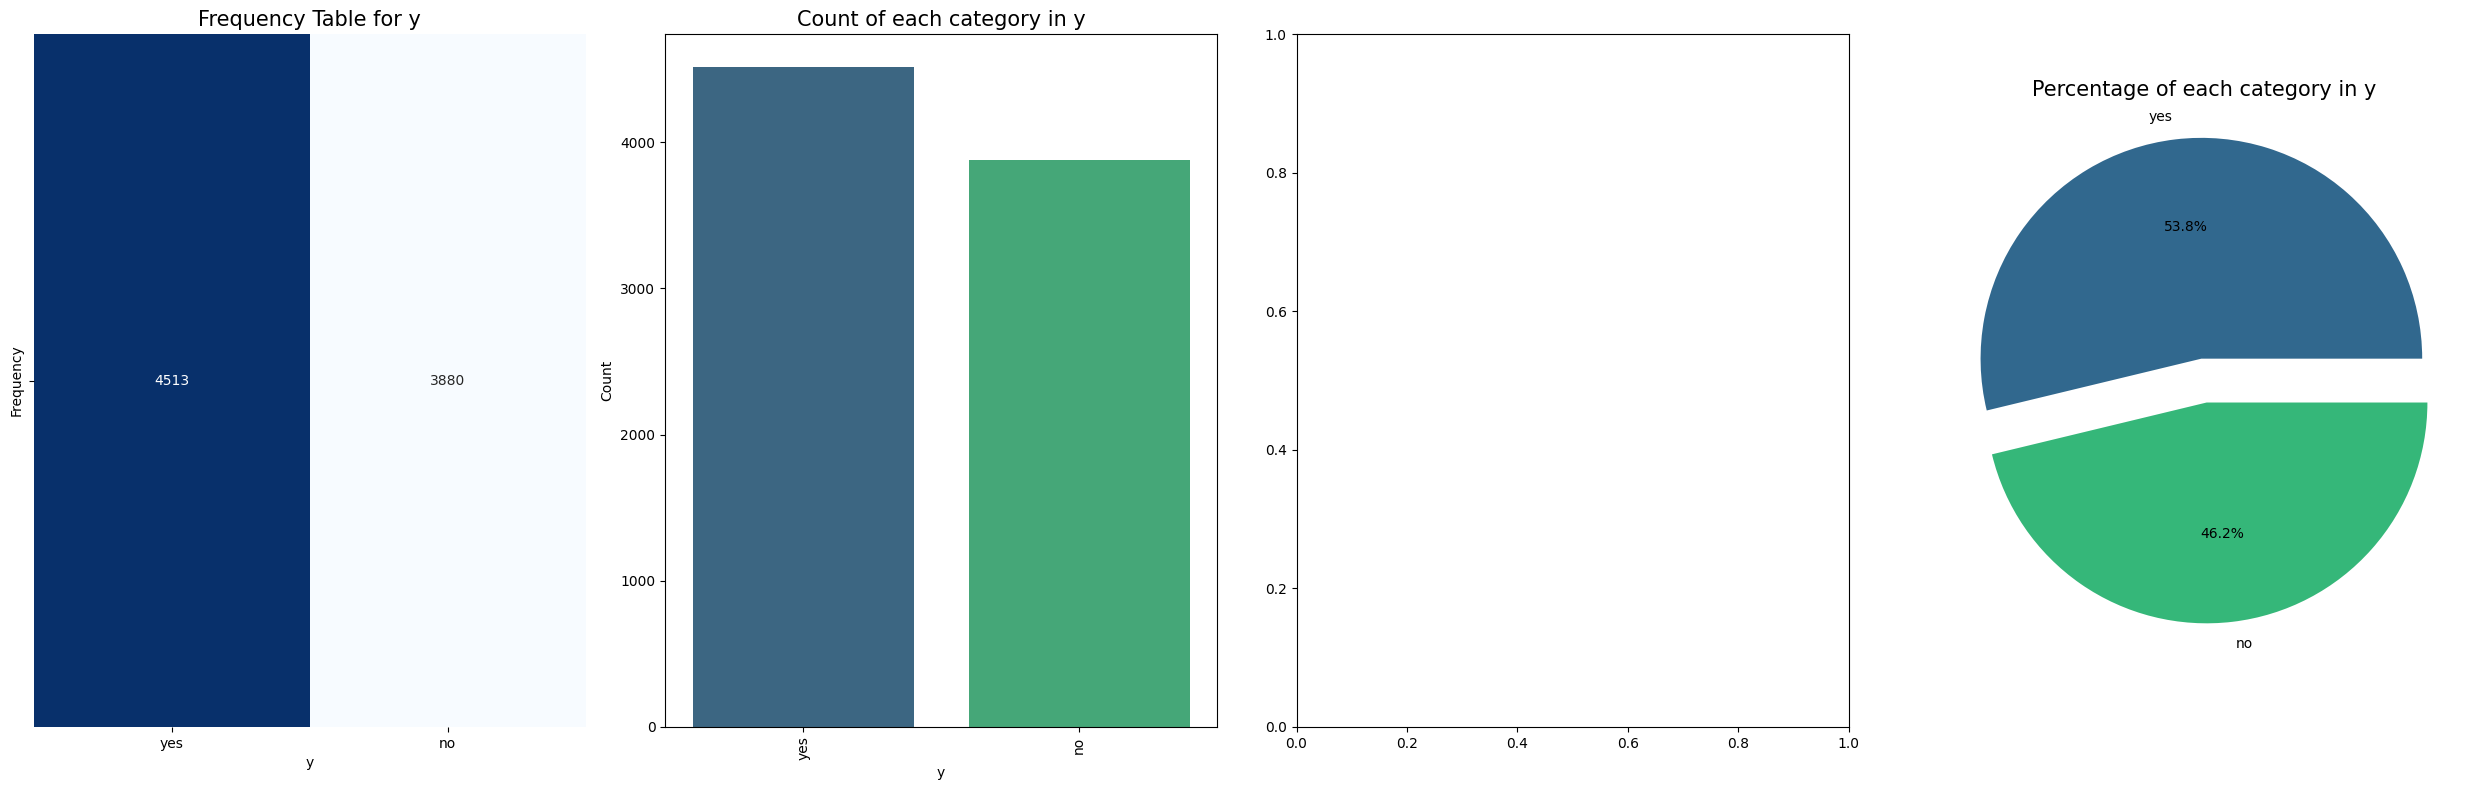

In [89]:
EDA_cat(df, 'y')

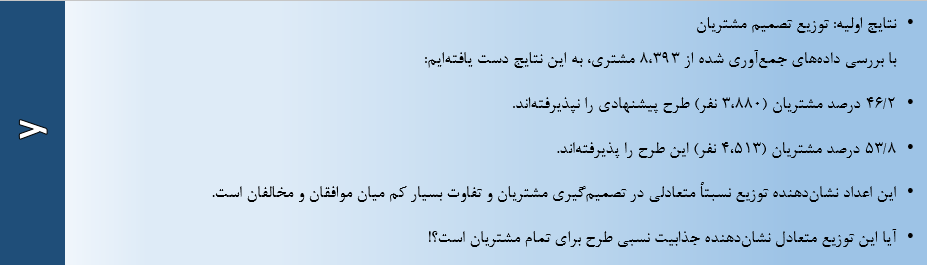

In [90]:
df['y'].replace({"no":0, "yes":1}, inplace=True)
df['y'].value_counts()

,count
y,
1,4513
0,3880


#### **2.1.2) Marital**

Basic EDA:


,count
marital,
married,4702
single,2748
divorced,943


----------------------------------------------------------------------------------------------------
Number of Unique Categories: 3
----------------------------------------------------------------------------------------------------


,marital,total_customers,accepted_customers,rejected_customers,acceptance_rate,rejection_rate
0,divorced,943,514,429,54.506893,45.493107
1,married,4702,2350,2352,49.978732,50.021268
2,single,2748,1649,1099,60.007278,39.992722


----------------------------------------------------------------------------------------------------


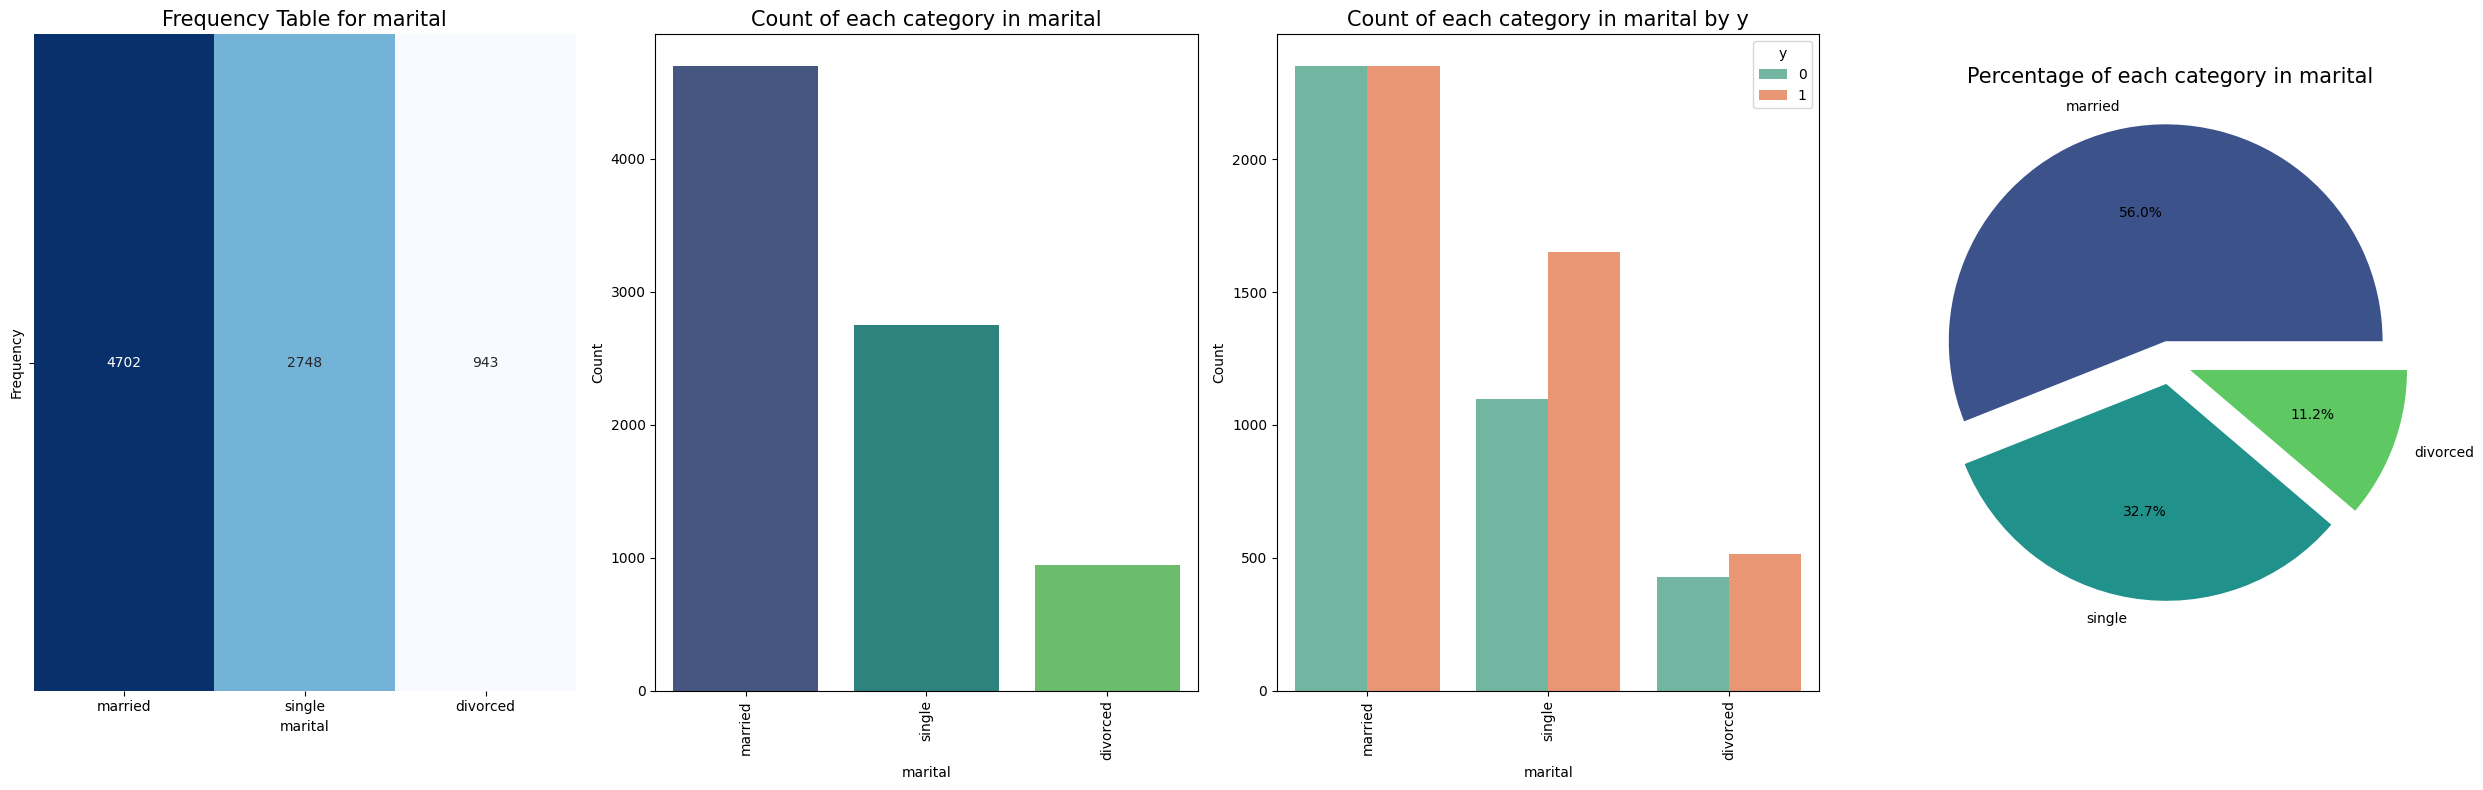

In [92]:
EDA_cat(df, 'marital', 'y')

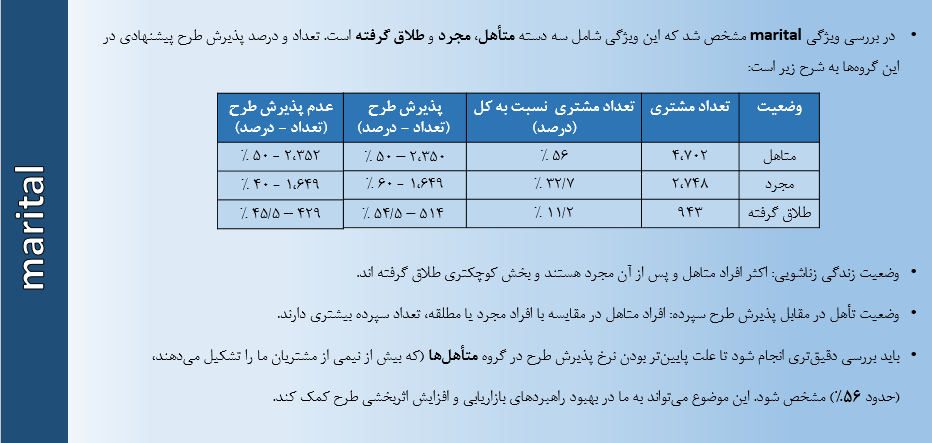

#### **2.1.3) Education**

Basic EDA:


,count
education,
secondary,4178
tertiary,3174
primary,1041


----------------------------------------------------------------------------------------------------
Number of Unique Categories: 3
----------------------------------------------------------------------------------------------------


,education,total_customers,accepted_customers,rejected_customers,acceptance_rate,rejection_rate
0,primary,1041,504,537,48.414986,51.585014
1,secondary,4178,2151,2027,51.483964,48.516036
2,tertiary,3174,1858,1316,58.538122,41.461878


----------------------------------------------------------------------------------------------------


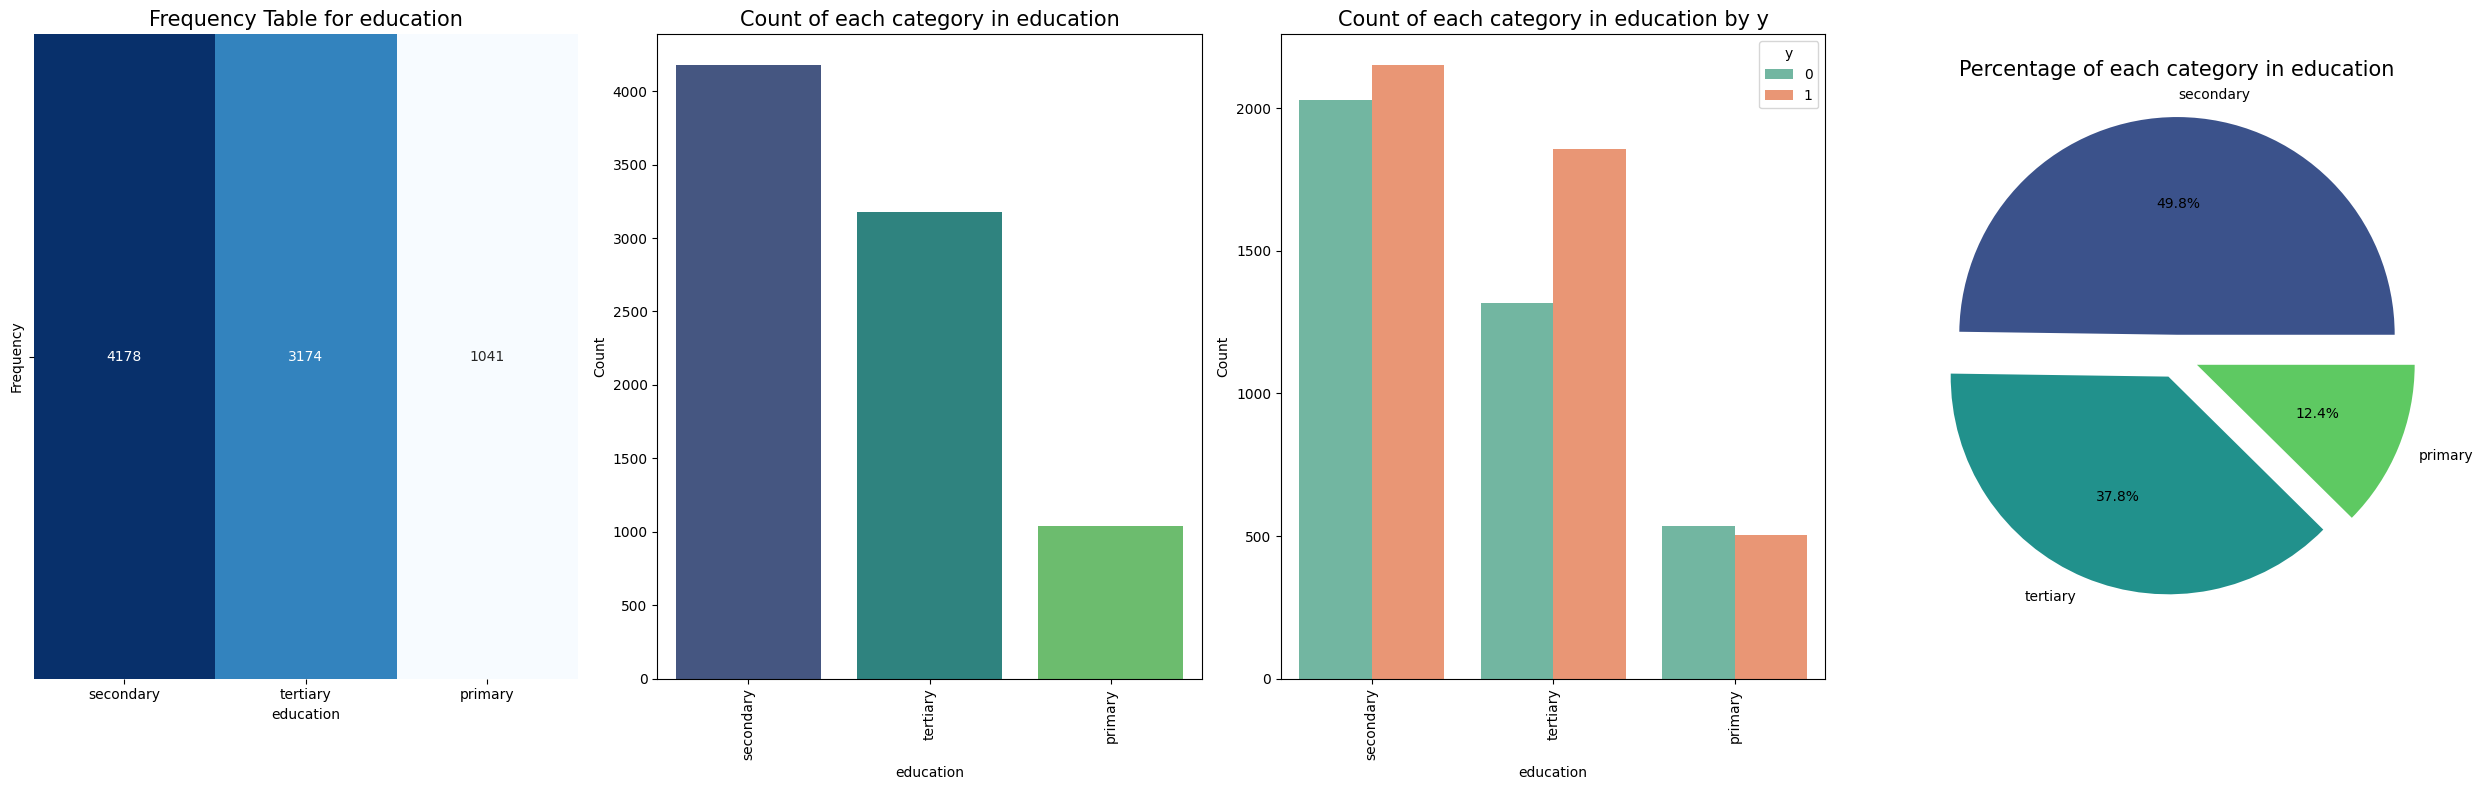

In [93]:
EDA_cat(df, 'education', 'y')

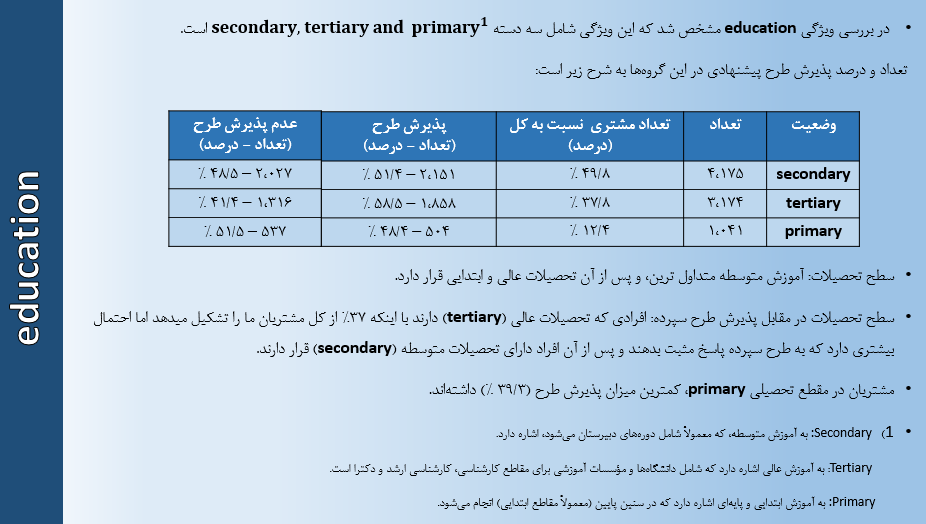

#### **2.1.4) Housing**

Basic EDA:


,count
housing,
no,4919
yes,3474


----------------------------------------------------------------------------------------------------
Number of Unique Categories: 2
----------------------------------------------------------------------------------------------------


,housing,total_customers,accepted_customers,rejected_customers,acceptance_rate,rejection_rate
0,no,4919,3001,1918,61.008335,38.991665
1,yes,3474,1512,1962,43.523316,56.476684


----------------------------------------------------------------------------------------------------


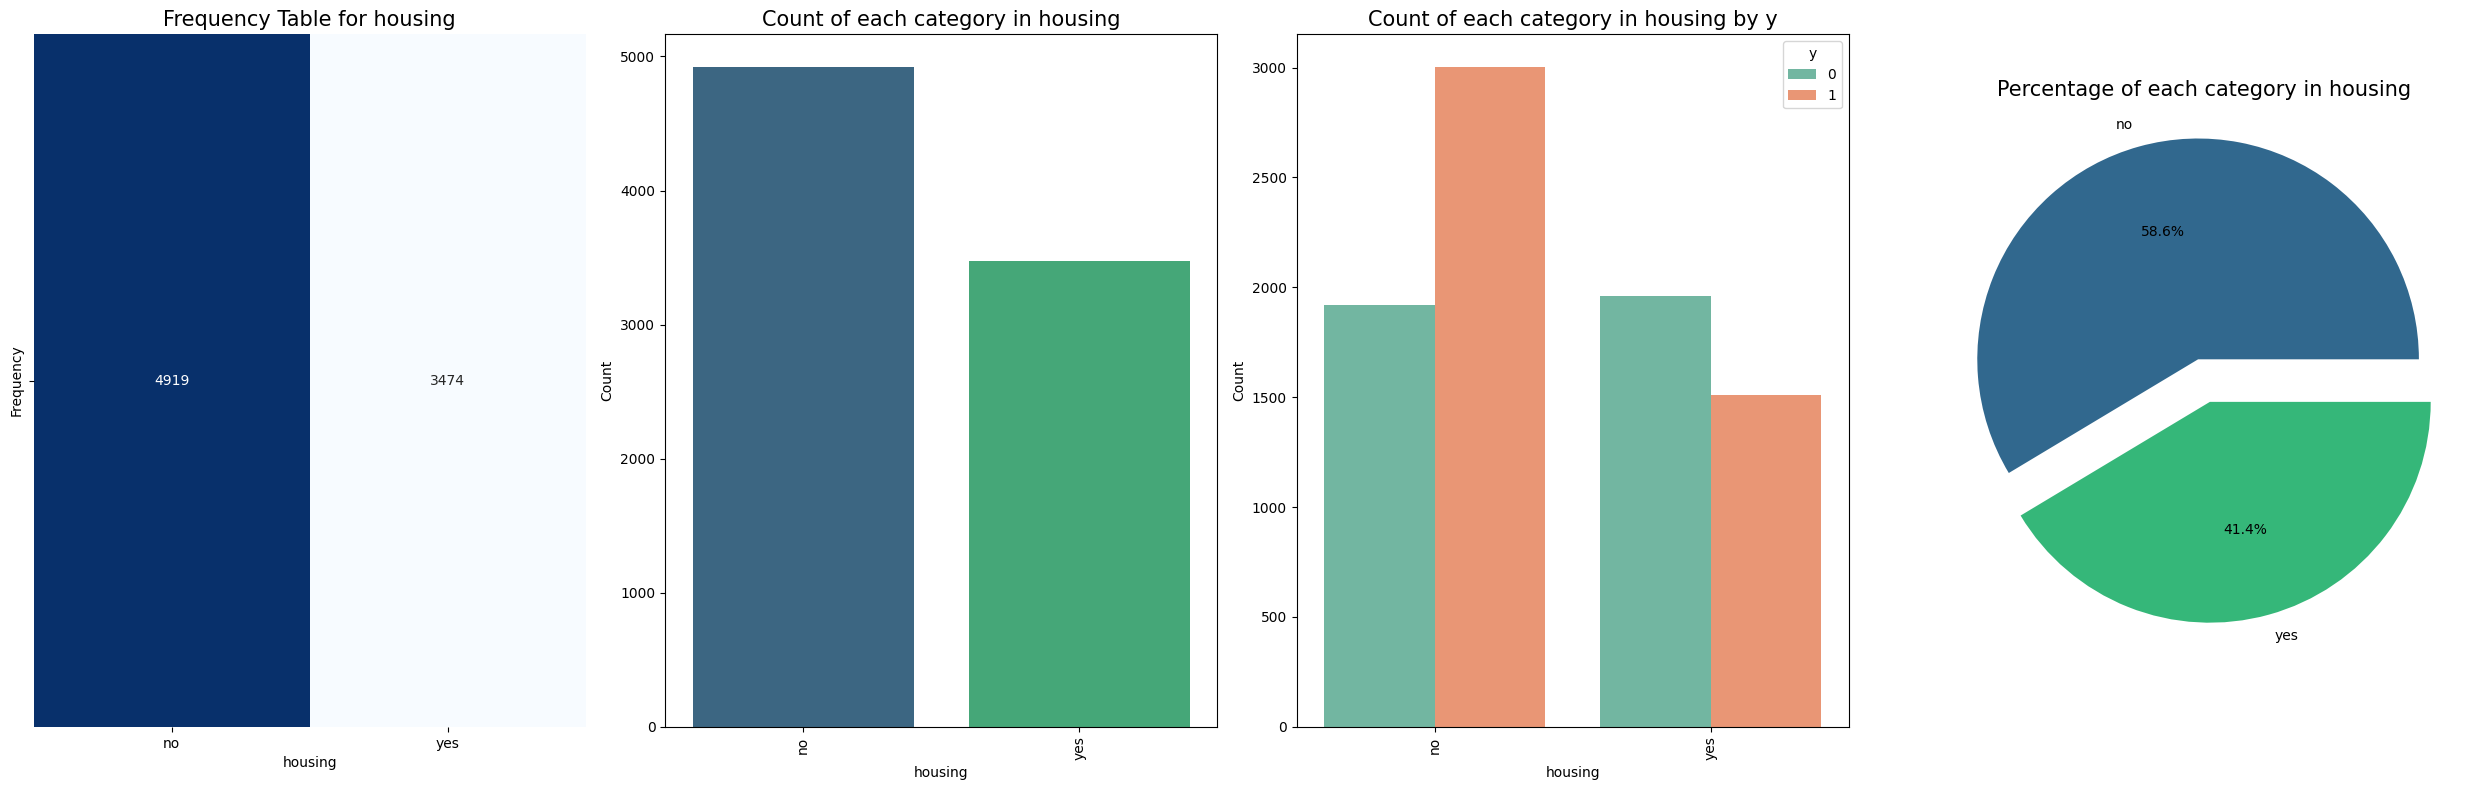

In [94]:
EDA_cat(df, 'housing', 'y')

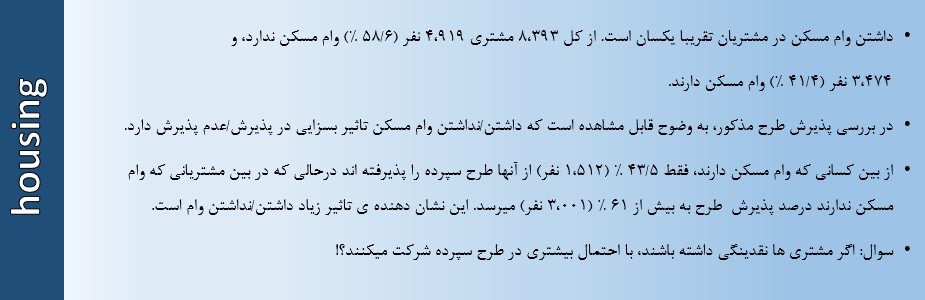

#### **2.1.5) Loan**

Basic EDA:


,count
loan,
no,7278
yes,1115


----------------------------------------------------------------------------------------------------
Number of Unique Categories: 2
----------------------------------------------------------------------------------------------------


,loan,total_customers,accepted_customers,rejected_customers,acceptance_rate,rejection_rate
0,no,7278,4107,3171,56.430338,43.569662
1,yes,1115,406,709,36.412556,63.587444


----------------------------------------------------------------------------------------------------


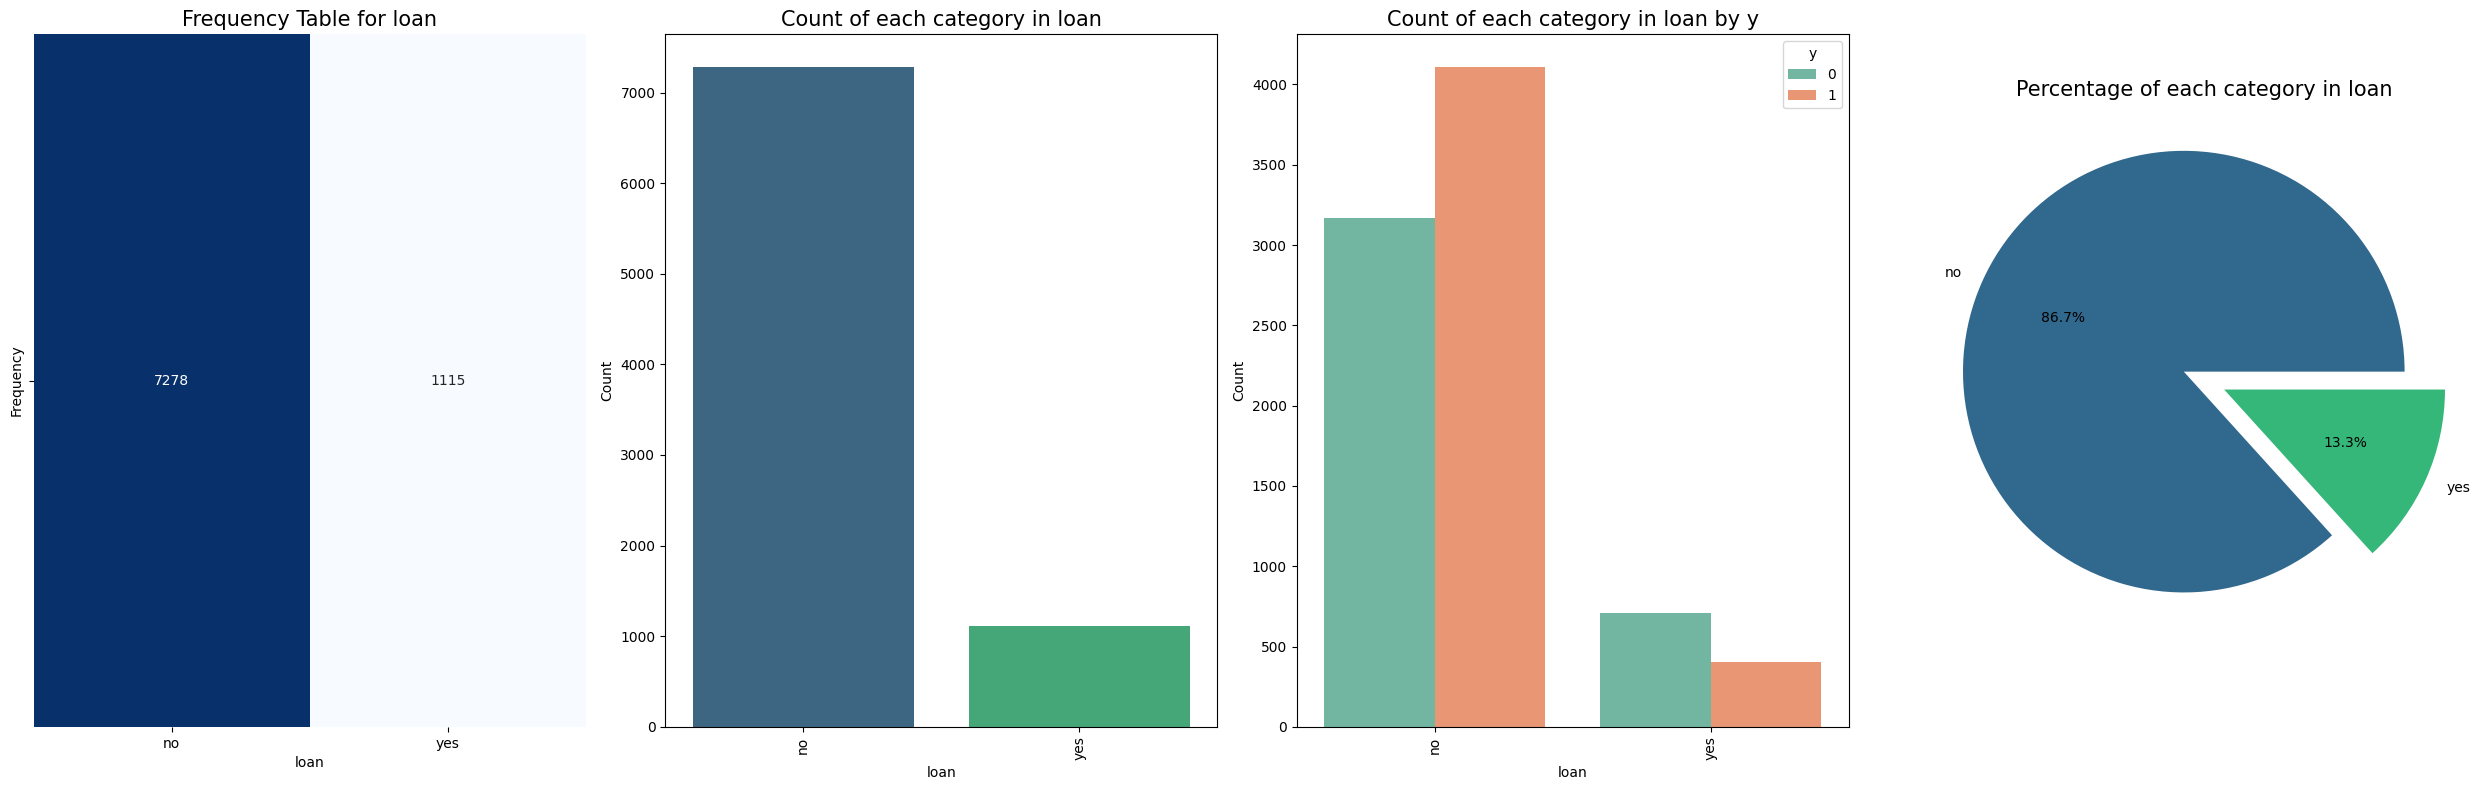

In [95]:
EDA_cat(df, 'loan', 'y')

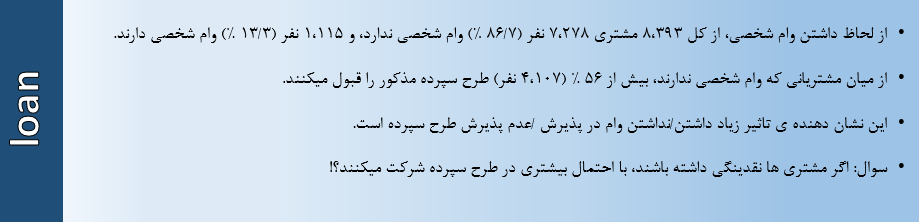

#### **2.1.6) Month**

Basic EDA:


,count
month,
aug,1444
jul,1390
may,1354
nov,893
apr,869
feb,735
jun,394
oct,342
jan,319


----------------------------------------------------------------------------------------------------
Number of Unique Categories: 12
----------------------------------------------------------------------------------------------------


,month,total_customers,accepted_customers,rejected_customers,acceptance_rate,rejection_rate
0,apr,869,538,331,61.910242,38.089758
1,aug,1444,654,790,45.290859,54.709141
2,dec,102,93,9,91.176471,8.823529
3,feb,735,414,321,56.326531,43.673469
4,jan,319,131,188,41.065831,58.934169
5,jul,1390,575,815,41.366906,58.633094
6,jun,394,326,68,82.741117,17.258883
7,mar,264,237,27,89.772727,10.227273
8,may,1354,638,716,47.119645,52.880355
9,nov,893,377,516,42.217245,57.782755


----------------------------------------------------------------------------------------------------


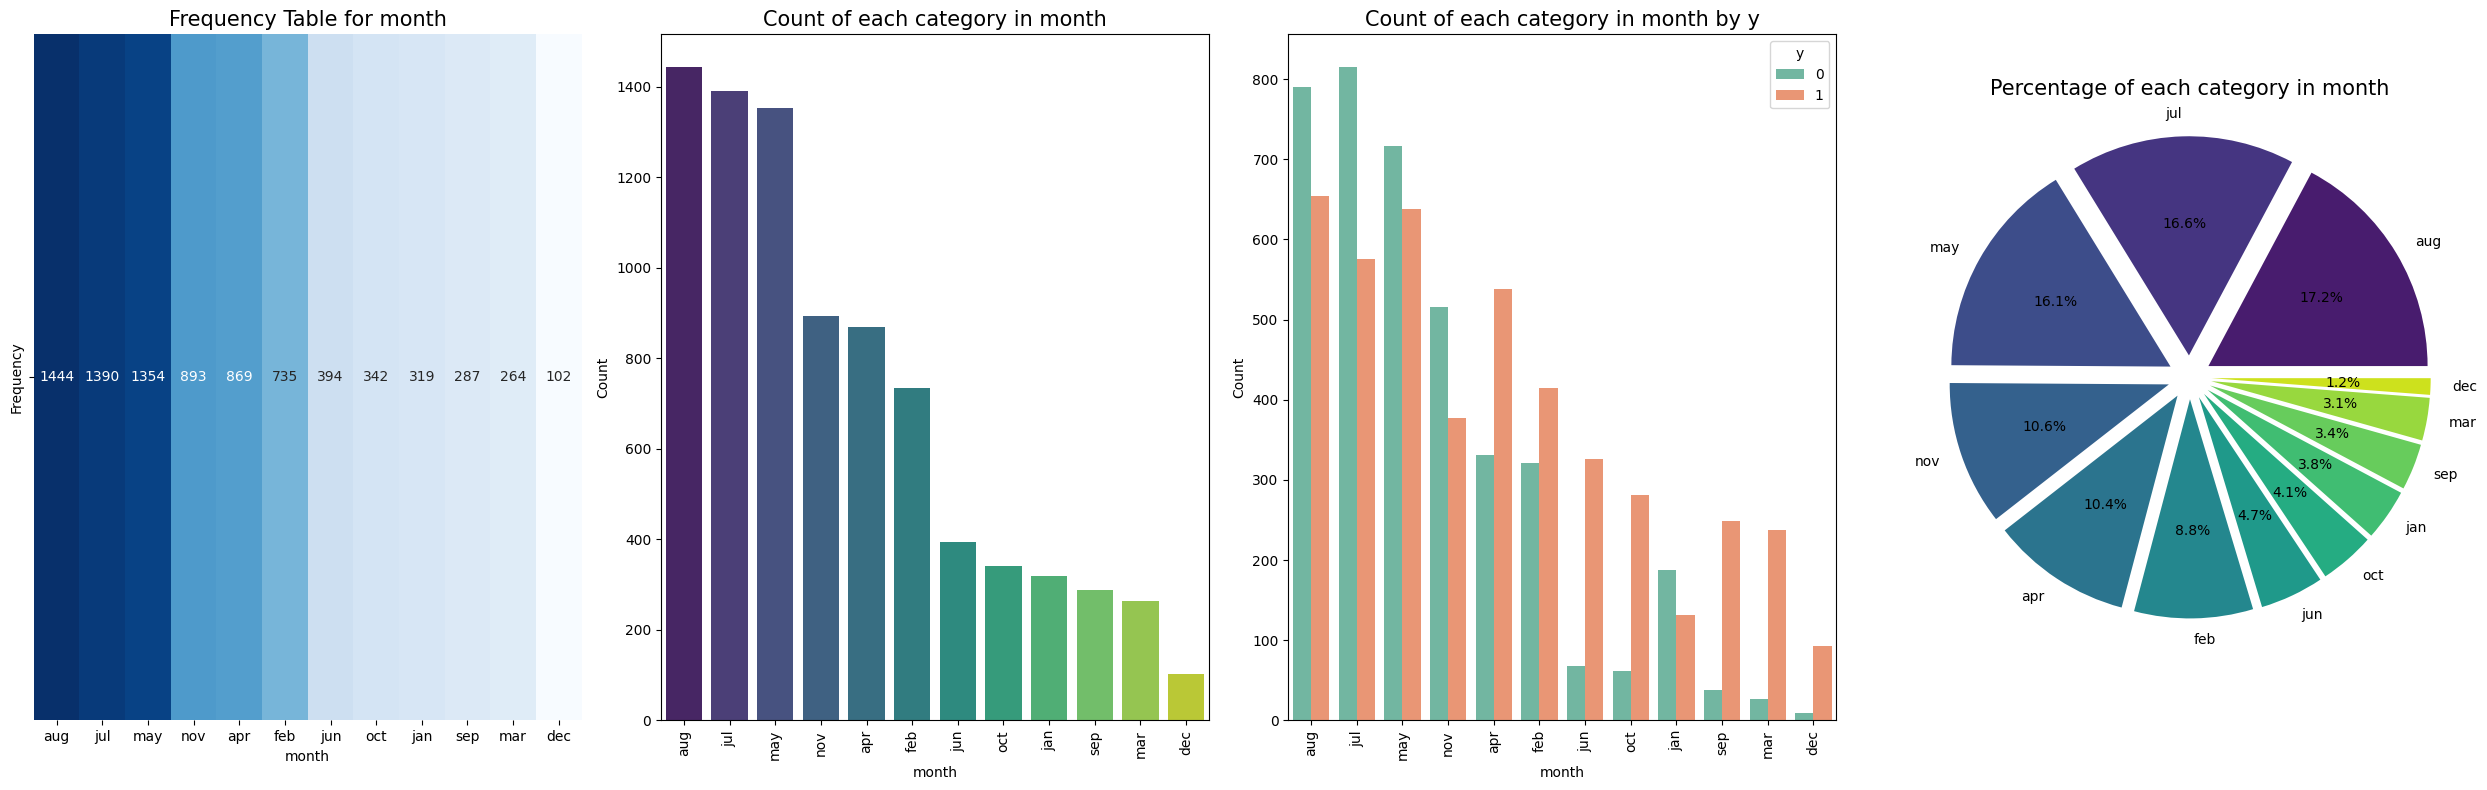

In [96]:
EDA_cat(df, 'month', 'y')

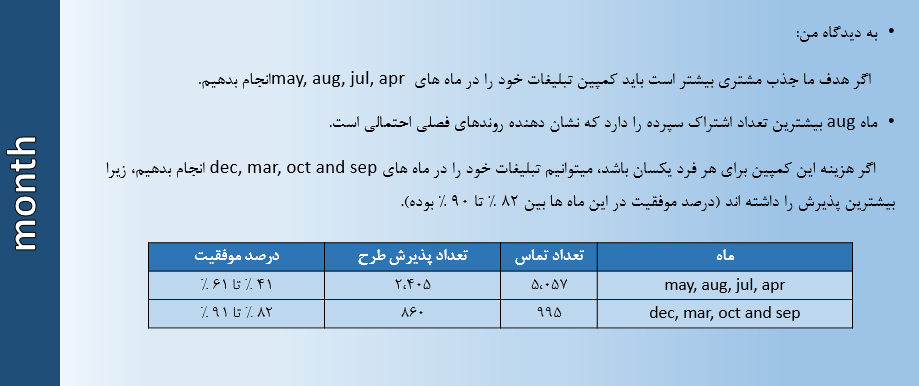

#### **2.1.7) Job**

Basic EDA:


,count
job,
management,2124
technician,1436
blue-collar,1199
admin.,1024
retired,646
services,642
self-employed,309
unemployed,292
student,280


----------------------------------------------------------------------------------------------------
Number of Unique Categories: 11
----------------------------------------------------------------------------------------------------


,job,total_customers,accepted_customers,rejected_customers,acceptance_rate,rejection_rate
0,admin.,1024,552,472,53.906250,46.093750
1,blue-collar,1199,525,674,43.786489,56.213511
2,entrepreneur,234,100,134,42.735043,57.264957
3,housemaid,207,94,113,45.410628,54.589372
4,management,2124,1168,956,54.990584,45.009416
5,retired,646,467,179,72.291022,27.708978
6,self-employed,309,161,148,52.103560,47.896440
7,services,642,304,338,47.352025,52.647975
8,student,280,223,57,79.642857,20.357143
9,technician,1436,737,699,51.323120,48.676880


----------------------------------------------------------------------------------------------------


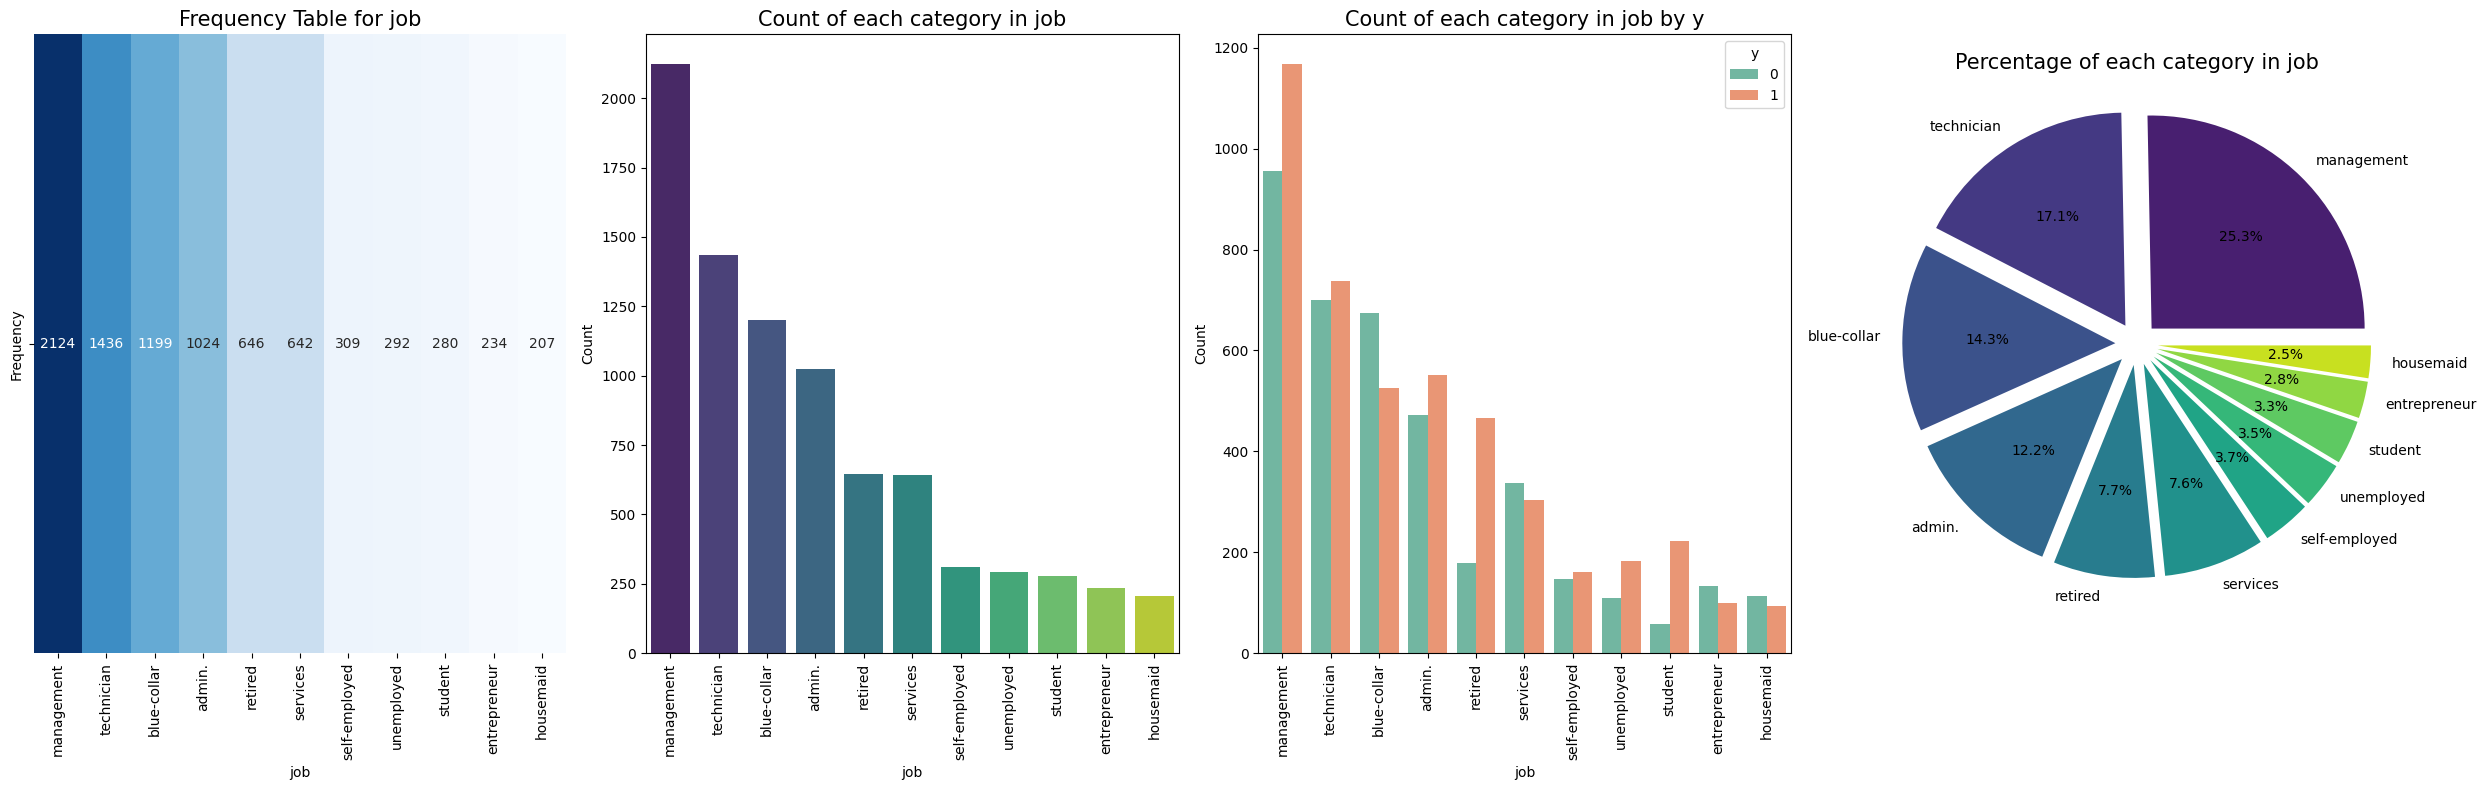

In [97]:
EDA_cat(df, 'job', 'y')

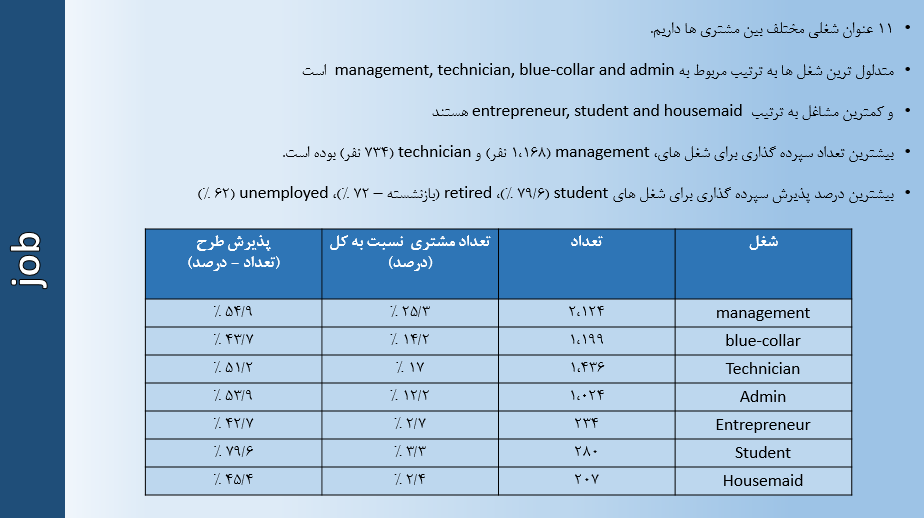

#### **2.1.8) Default**

Basic EDA:


,count
default,
no,8290
yes,103


----------------------------------------------------------------------------------------------------
Number of Unique Categories: 2
----------------------------------------------------------------------------------------------------


,default,total_customers,accepted_customers,rejected_customers,acceptance_rate,rejection_rate
0,no,8290,4479,3811,54.028951,45.971049
1,yes,103,34,69,33.009709,66.990291


----------------------------------------------------------------------------------------------------


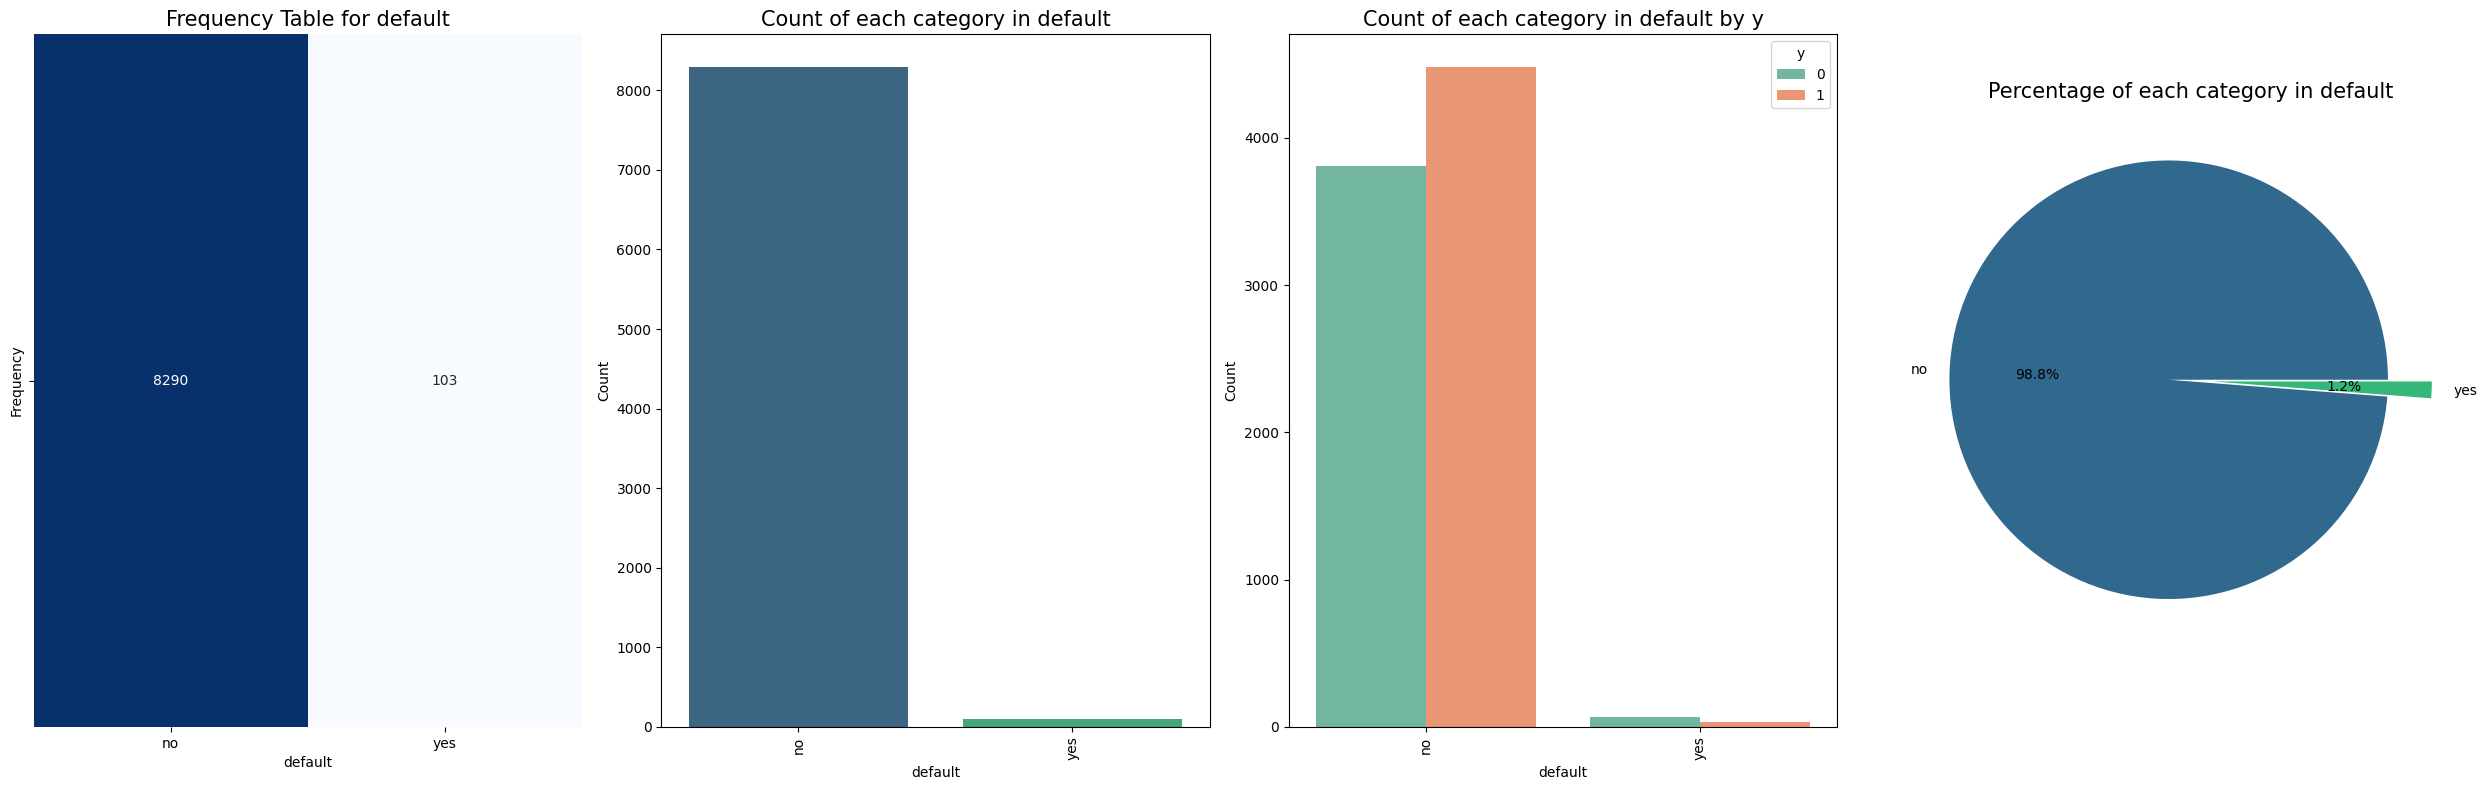

In [98]:
EDA_cat(df, 'default', 'y')

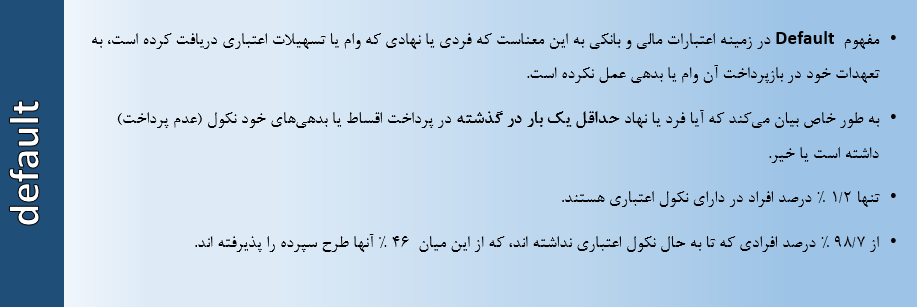

#### **2.1.9) contact**

Basic EDA:


,count
contact,
cellular,7692
telephone,701


----------------------------------------------------------------------------------------------------
Number of Unique Categories: 2
----------------------------------------------------------------------------------------------------


,contact,total_customers,accepted_customers,rejected_customers,acceptance_rate,rejection_rate
0,cellular,7692,4163,3529,54.121165,45.878835
1,telephone,701,350,351,49.928673,50.071327


----------------------------------------------------------------------------------------------------


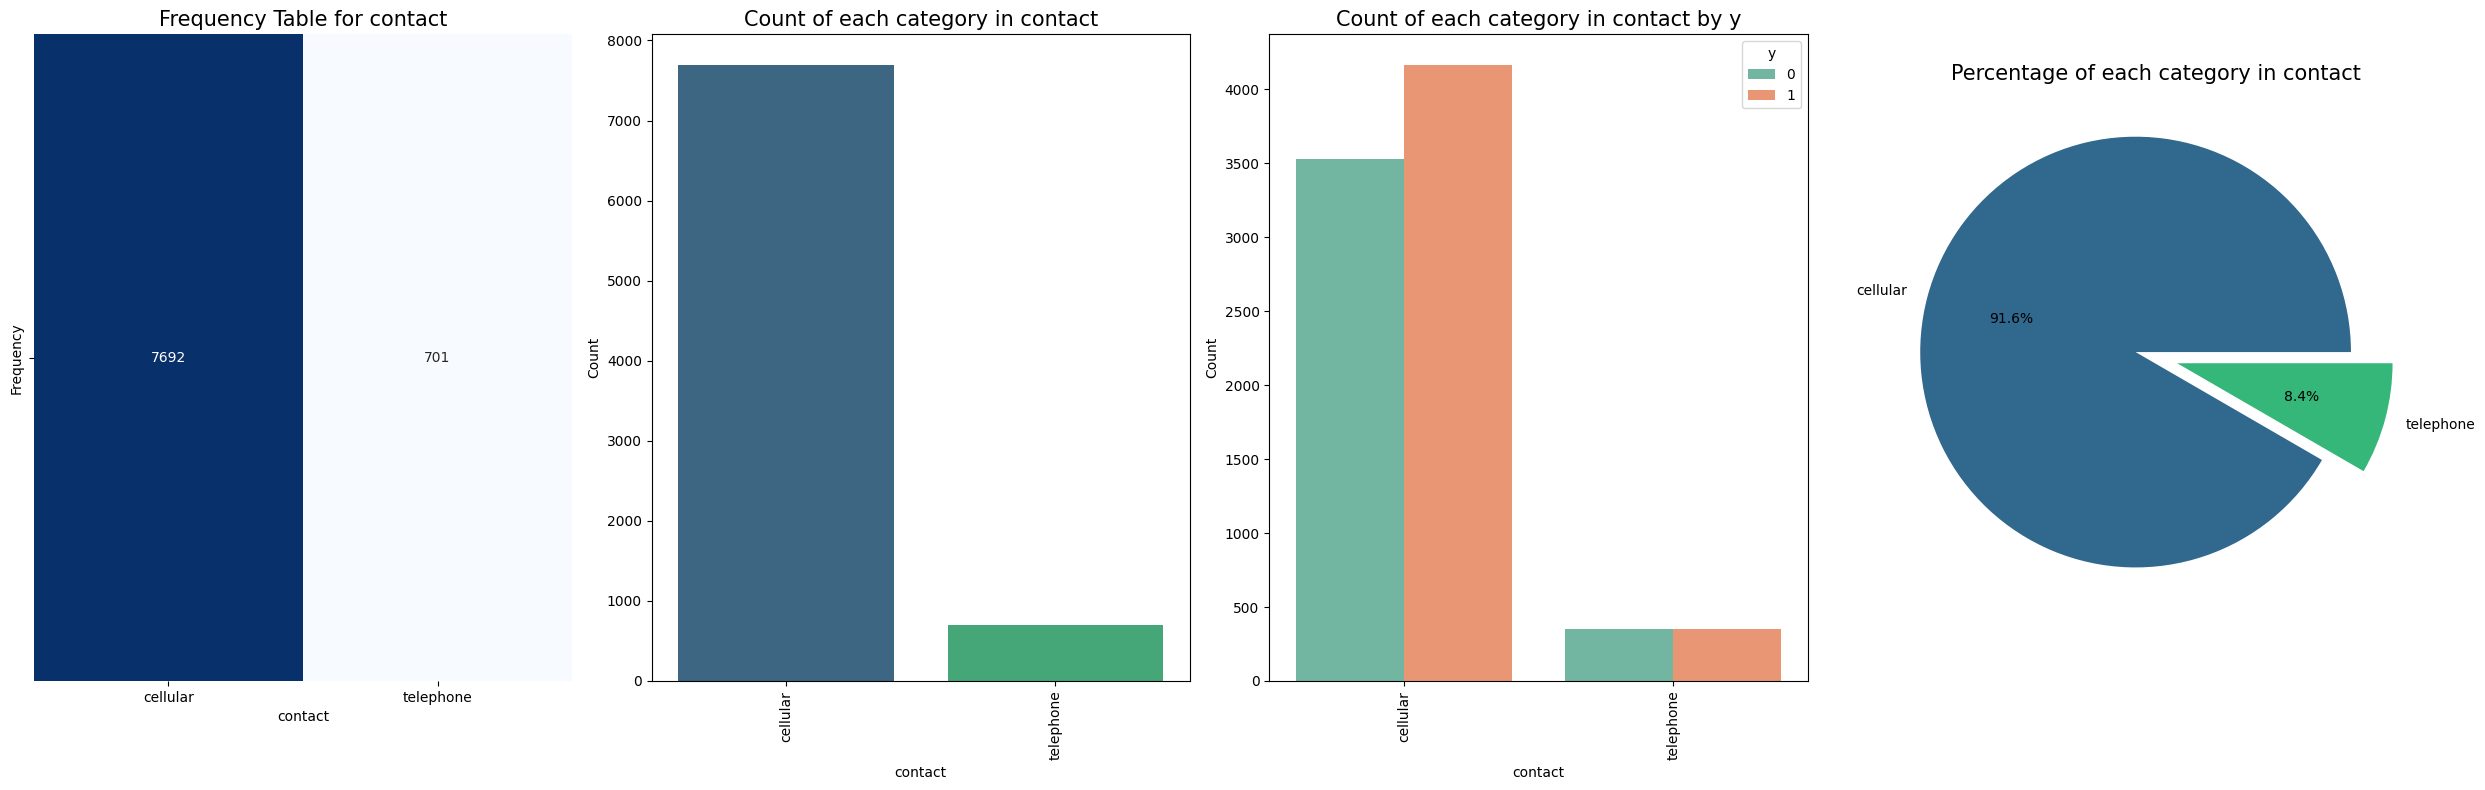

In [99]:
EDA_cat(df, 'contact', 'y')

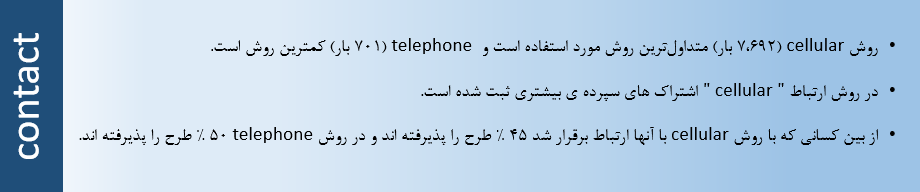

## **2.2) Analysis of numerical data:**


In [100]:
df.select_dtypes(include=np.int64)

,age,balance,day,duration,campaign,pdays,previous,y
367,28,-127,4,1044,3,-1,0,1
368,55,49,7,494,4,-1,0,1
369,51,216,7,615,2,-1,0,1
370,39,506,7,718,2,-1,0,1
371,42,213,7,434,3,-1,0,1
...,...,...,...,...,...,...,...,...
11156,34,-72,7,273,5,-1,0,0
11157,33,1,20,257,1,-1,0,0
11159,32,29,19,156,2,-1,0,0
11160,43,0,8,9,2,172,5,0


#### **2.2.1) Campaign**

Basic EDA:


,campaign
count,8393.000000
mean,2.436673
std,2.459457
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,43.000000


----------------------------------------------------------------------------------------------------


,count
campaign,
1,3651
2,2285
3,963
4,590
5,290
6,210
7,101
8,97
9,43


----------------------------------------------------------------------------------------------------
Skewness: 4.63
Kurtosis: 36.12
----------------------------------------------------------------------------------------------------
Number of Values: 31
----------------------------------------------------------------------------------------------------
Is the data distribution normal?: Sample does not look Gaussian (reject H0)
----------------------------------------------------------------------------------------------------
Univariate analysis Outlier value: campaign Than y
Number of outliers in Class 0: 31
Number of outliers in Class 1: 4
Number of outliers: 35


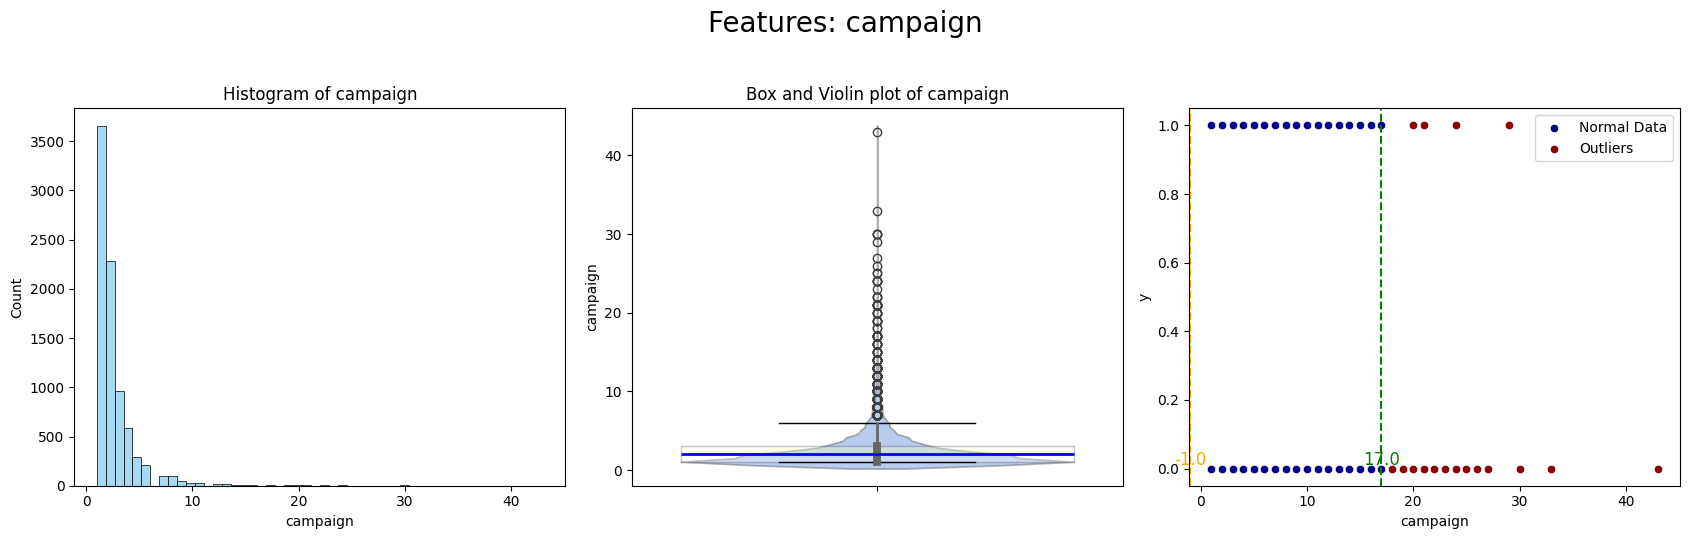

In [101]:
lower_cap, upper_cap = EDA_num(df, 'campaign', 'y', alpha_l=1, alpha_u=7)

In [102]:
df['campaign'] = np.where(df['campaign'] > 27, 27, df['campaign'])

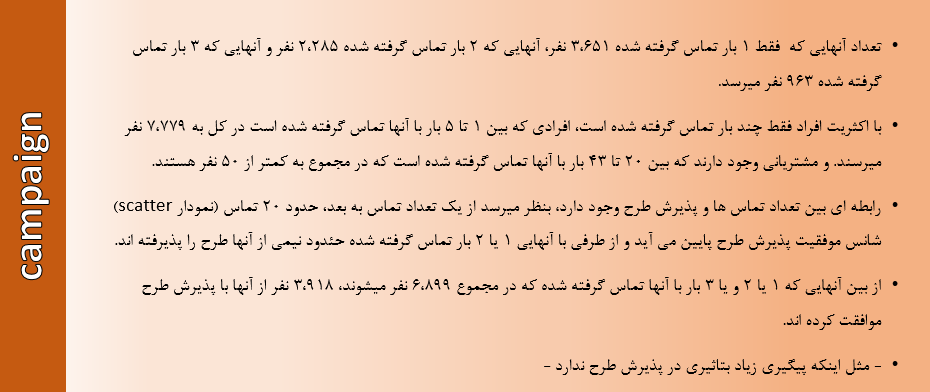

#### **2.2.2) Age**

Basic EDA:


,age
count,8393.000000
mean,41.261766
std,12.282230
min,18.000000
25%,32.000000
50%,38.000000
75%,49.000000
max,95.000000


----------------------------------------------------------------------------------------------------


,count
age,
31,386
33,379
32,379
34,370
30,367
...,...
18,3
90,2
88,2


----------------------------------------------------------------------------------------------------
Skewness: 0.9
Kurtosis: 0.54
----------------------------------------------------------------------------------------------------
Number of Values: 74
----------------------------------------------------------------------------------------------------
Is the data distribution normal?: Sample does not look Gaussian (reject H0)
----------------------------------------------------------------------------------------------------
Univariate analysis Outlier value: age Than y
Number of outliers in Class 0: 0
Number of outliers in Class 1: 0
Number of outliers: 0


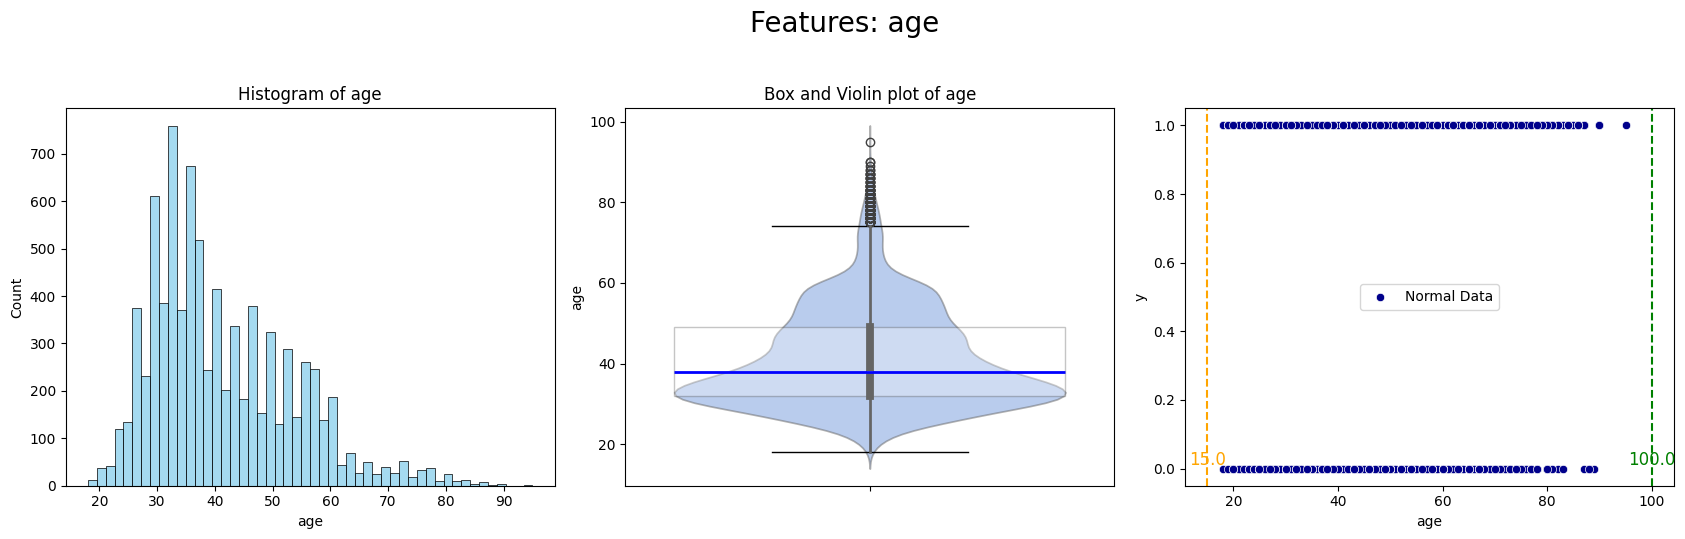

In [103]:
lower_cap, upper_cap = EDA_num(df, 'age', 'y', alpha_l=1, alpha_u=3)

In [104]:
class_0 = df[df['y'] == 0]
class_1 = df[df['y'] == 1]

print(class_0['age'].mean(), class_1['age'].mean())

40.70386597938144 41.741413693773545


In [105]:
df['age'] = np.where(df['age'] > 90, 90, df['age'])

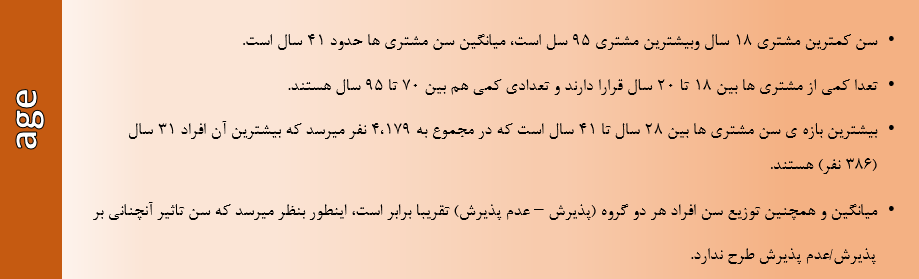

#### **2.2.3) Duration**

Basic EDA:


,duration
count,8393.000000
mean,375.467175
std,338.627469
min,2.000000
25%,146.000000
50%,263.000000
75%,501.000000
max,3284.000000


----------------------------------------------------------------------------------------------------


,count
duration,
158,31
131,30
119,30
106,30
90,29
...,...
1003,1
992,1
1104,1


----------------------------------------------------------------------------------------------------
Skewness: 2.06
Kurtosis: 6.47
----------------------------------------------------------------------------------------------------
Number of Values: 1316
----------------------------------------------------------------------------------------------------
Is the data distribution normal?: Sample does not look Gaussian (reject H0)
----------------------------------------------------------------------------------------------------
Univariate analysis Outlier value: duration Than y
Number of outliers in Class 0: 0
Number of outliers in Class 1: 0
Number of outliers: 0


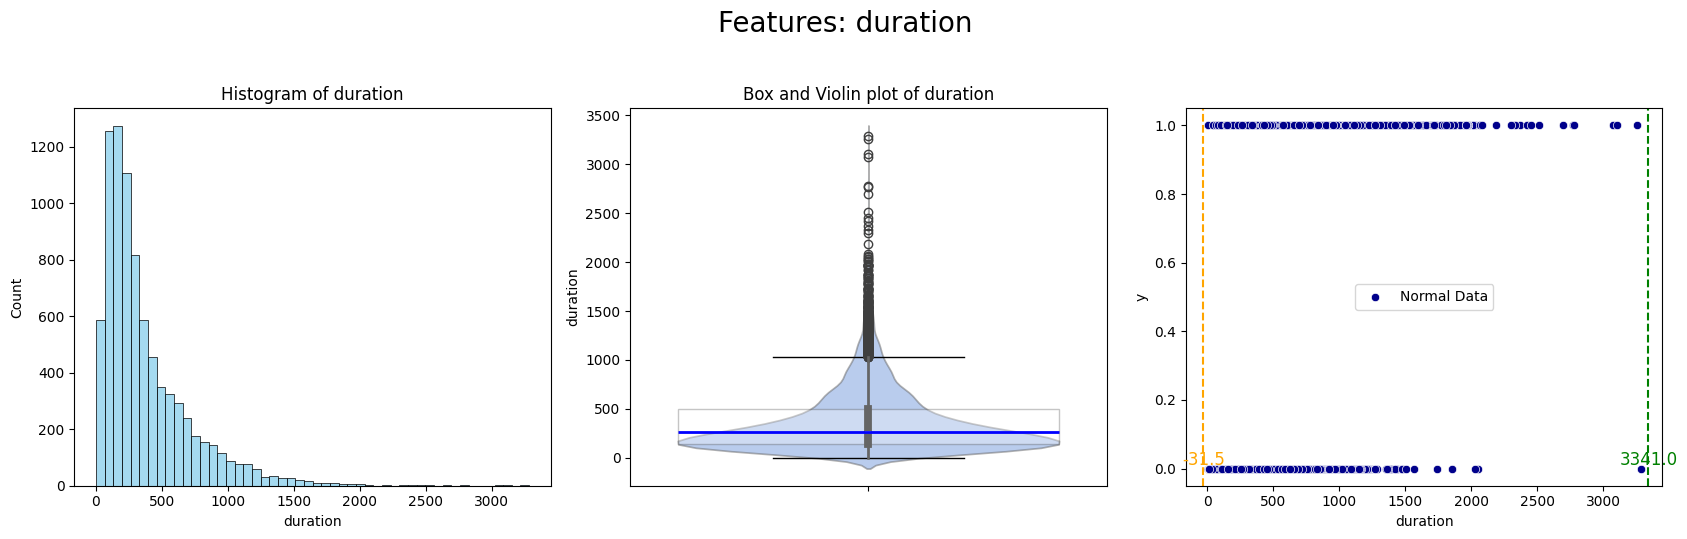

In [106]:
lower_cap, upper_cap = EDA_num(df, 'duration', 'y', alpha_l=0.5, alpha_u=8)

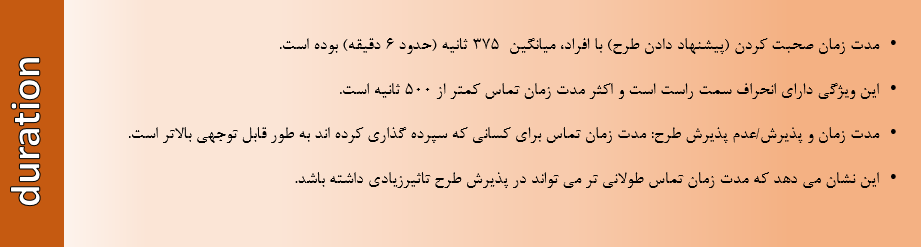

In [107]:
# Handling outlier
df['duration'] = np.where((df['duration'] > 2516) & (df['y']==1), 2516, df['duration'])
df['duration'] = np.where((df['duration'] > 2053) & (df['y']==0), 2053, df['duration'])

#### **2.2.4) Pdays**

Basic EDA:


,pdays
count,8393.000000
mean,64.288216
std,116.813541
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,95.000000
max,854.000000


----------------------------------------------------------------------------------------------------


,count
pdays,
-1,5716
92,101
182,80
181,79
91,76
...,...
532,1
481,1
445,1


----------------------------------------------------------------------------------------------------
Skewness: 2.02
Kurtosis: 4.46
----------------------------------------------------------------------------------------------------
Number of Values: 459
----------------------------------------------------------------------------------------------------
Is the data distribution normal?: Sample does not look Gaussian (reject H0)
----------------------------------------------------------------------------------------------------
Univariate analysis Outlier value: pdays Than y
Number of outliers in Class 0: 0
Number of outliers in Class 1: 0
Number of outliers: 0


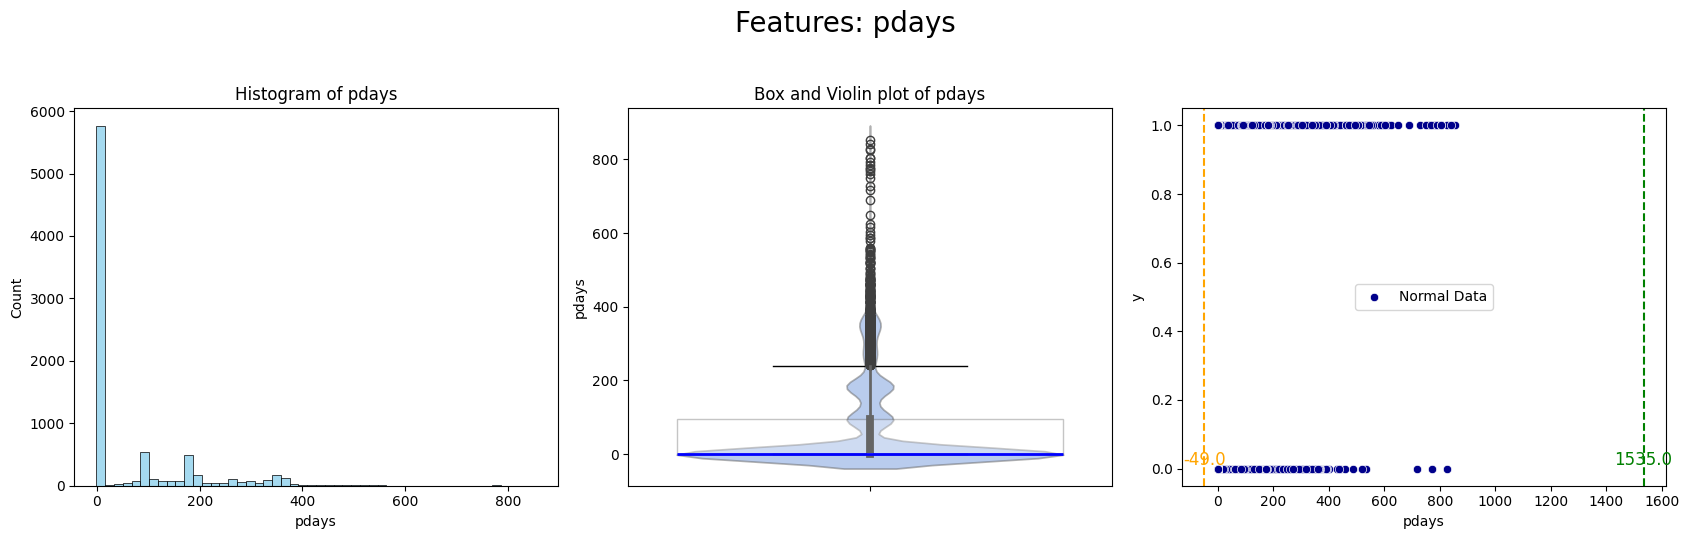

In [108]:
lower_cap, upper_cap = EDA_num(df, 'pdays', 'y', alpha_l=0.5, alpha_u=15)

In [109]:
df['pdays'] = np.where(df['pdays'] > 650, 650, df['pdays'])

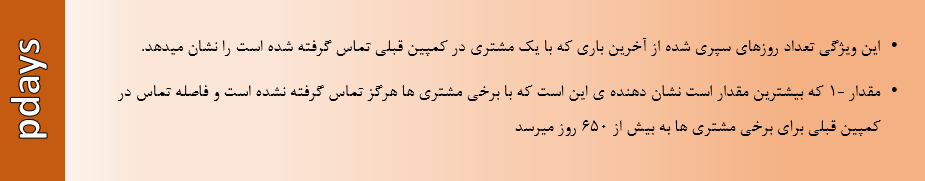

#### **2.2.5) Previous**

Basic EDA:


,previous
count,8393.000000
mean,1.051471
std,2.523714
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,58.000000


----------------------------------------------------------------------------------------------------


,count
previous,
0,5716
1,824
2,651
3,415
4,237
5,155
6,112
7,71
8,59


----------------------------------------------------------------------------------------------------
Skewness: 6.51
Kurtosis: 85.64
----------------------------------------------------------------------------------------------------
Number of Values: 33
----------------------------------------------------------------------------------------------------
Is the data distribution normal?: Sample does not look Gaussian (reject H0)
----------------------------------------------------------------------------------------------------
Univariate analysis Outlier value: previous Than y
Number of outliers in Class 0: 5
Number of outliers in Class 1: 5
Number of outliers: 10


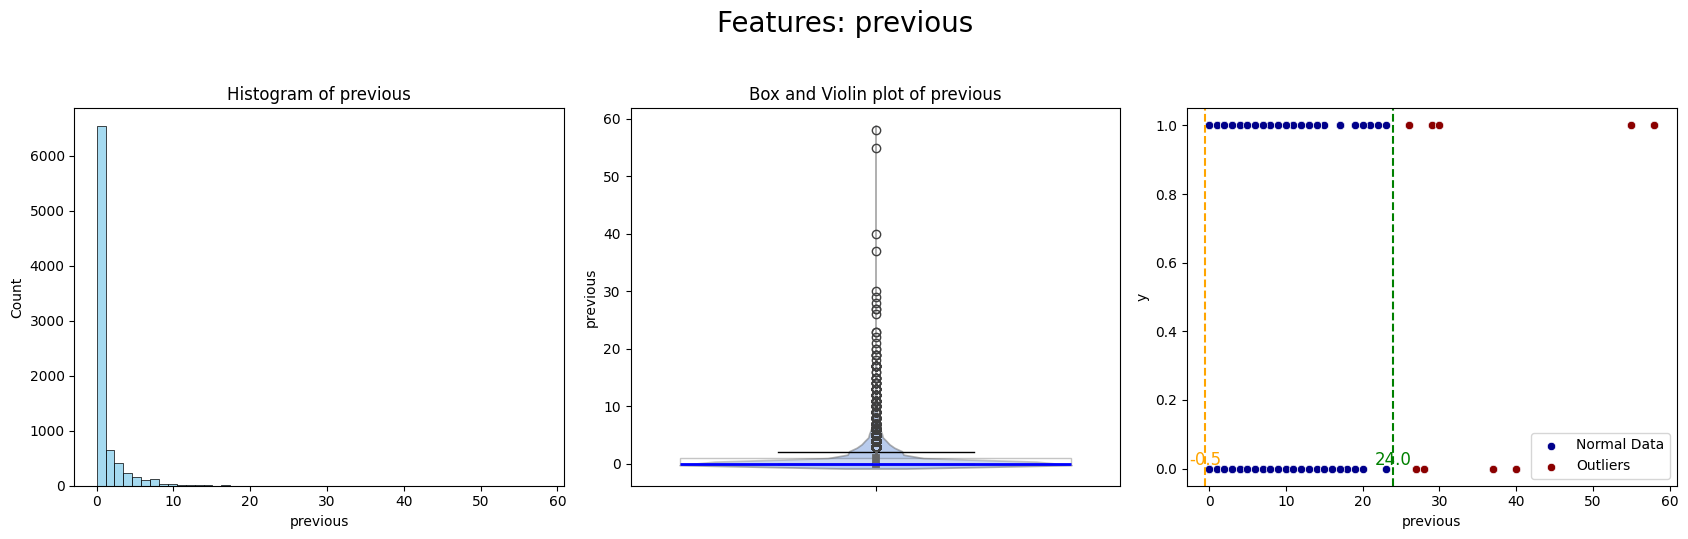

In [110]:
lower_cap, upper_cap = EDA_num(df, 'previous', 'y', alpha_l=0.5, alpha_u=23)

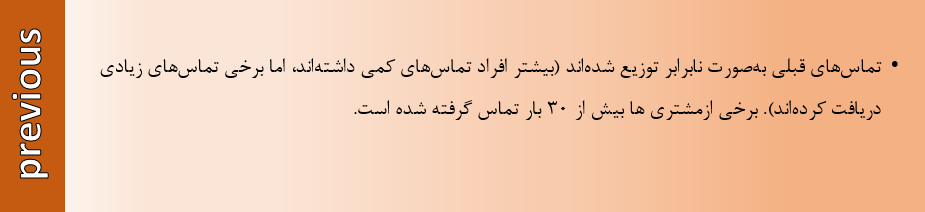

In [111]:
# Handling outlier
df['previous'] = np.where(df['previous'] > 30, 30, df['previous'])

#### **2.2.6) day**

Basic EDA:


,day
count,8393.000000
mean,15.611224
std,8.403283
min,1.000000
25%,8.000000
50%,15.000000
75%,22.000000
max,31.000000


----------------------------------------------------------------------------------------------------


,count
day,
18,476
15,367
21,364
13,362
14,354
30,352
20,350
17,347
12,344


----------------------------------------------------------------------------------------------------
Skewness: 0.12
Kurtosis: -1.03
----------------------------------------------------------------------------------------------------
Number of Values: 31
----------------------------------------------------------------------------------------------------
Is the data distribution normal?: Sample does not look Gaussian (reject H0)
----------------------------------------------------------------------------------------------------
Univariate analysis Outlier value: day Than y
Number of outliers in Class 0: 0
Number of outliers in Class 1: 0
Number of outliers: 0


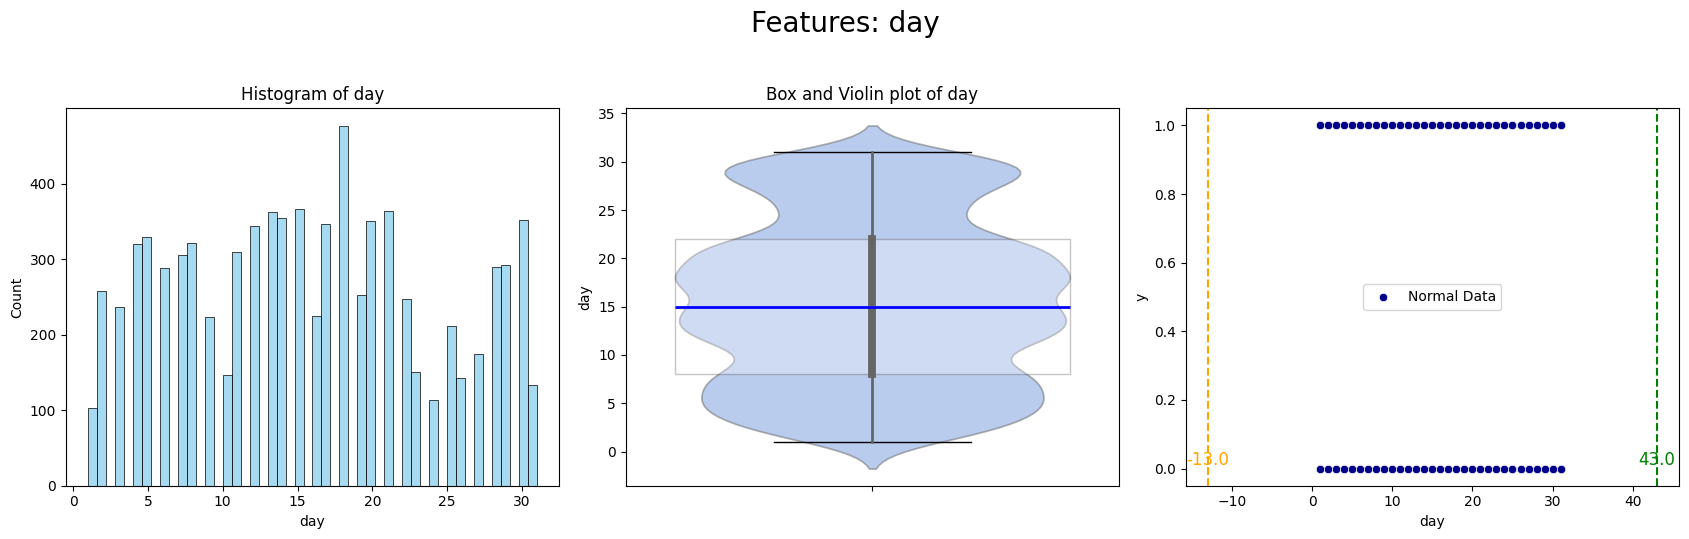

In [112]:
lower_cap, upper_cap = EDA_num(df, 'day', 'y')

#### **2.2.7) balance**

Basic EDA:


,balance
count,8393.000000
mean,1600.125819
std,3381.324330
min,-6847.000000
25%,133.000000
50%,580.000000
75%,1796.000000
max,81204.000000


----------------------------------------------------------------------------------------------------


,count
balance,
0,595
1,28
3,26
2,26
4,23
...,...
4416,1
1055,1
3902,1


----------------------------------------------------------------------------------------------------
Skewness: 8.26
Kurtosis: 125.61
----------------------------------------------------------------------------------------------------
Number of Values: 3230
----------------------------------------------------------------------------------------------------
Is the data distribution normal?: Sample does not look Gaussian (reject H0)
----------------------------------------------------------------------------------------------------
Univariate analysis Outlier value: balance Than y
Number of outliers in Class 0: 2
Number of outliers in Class 1: 4
Number of outliers: 6


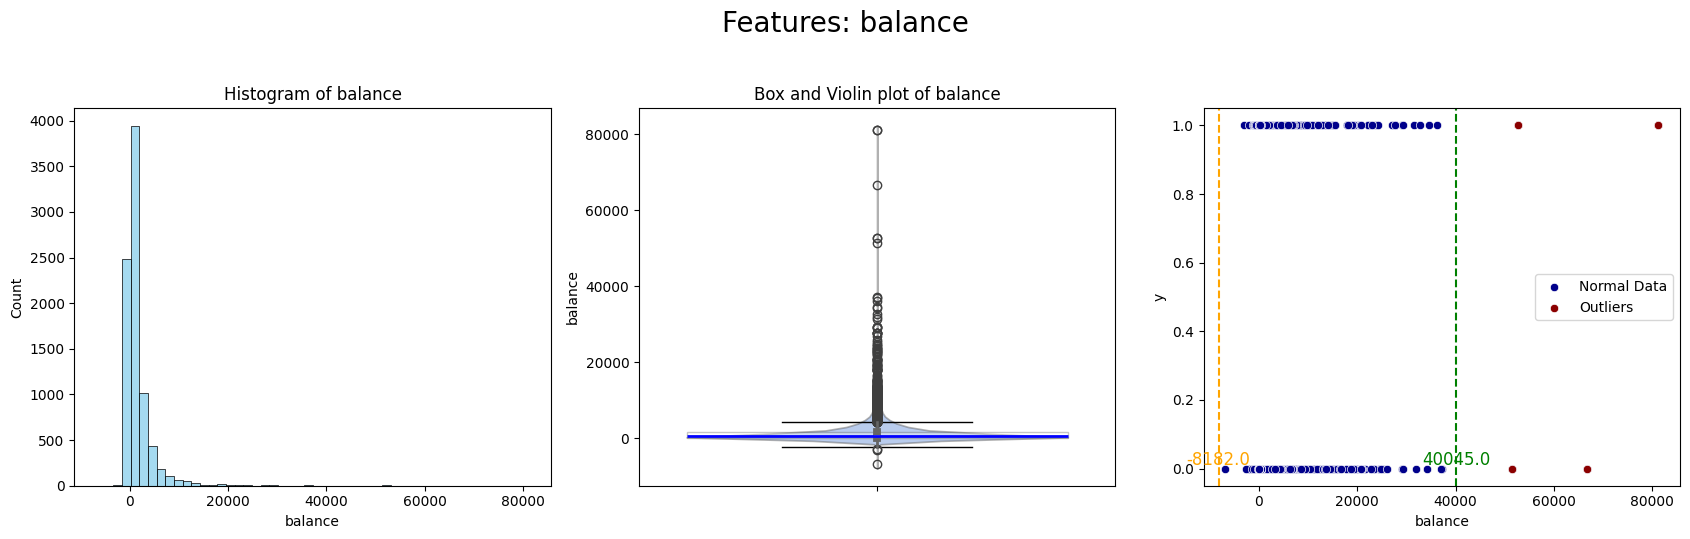

In [113]:
lower_cap, upper_cap = EDA_num(df, 'balance', 'y', alpha_l=5, alpha_u=23)

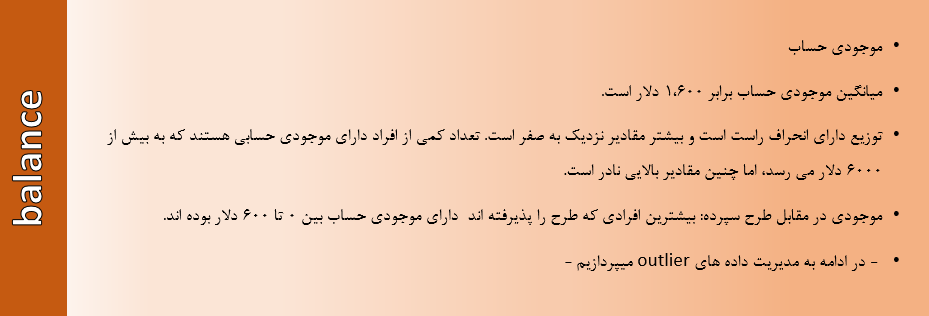

In [114]:
df['balance'] = np.where(df['balance'] < 0, 0, df['balance'])
df['balance'] = np.where(df['balance'] > upper_cap, upper_cap, df['balance'])

## **2.3.1) balance - categoriacl data**

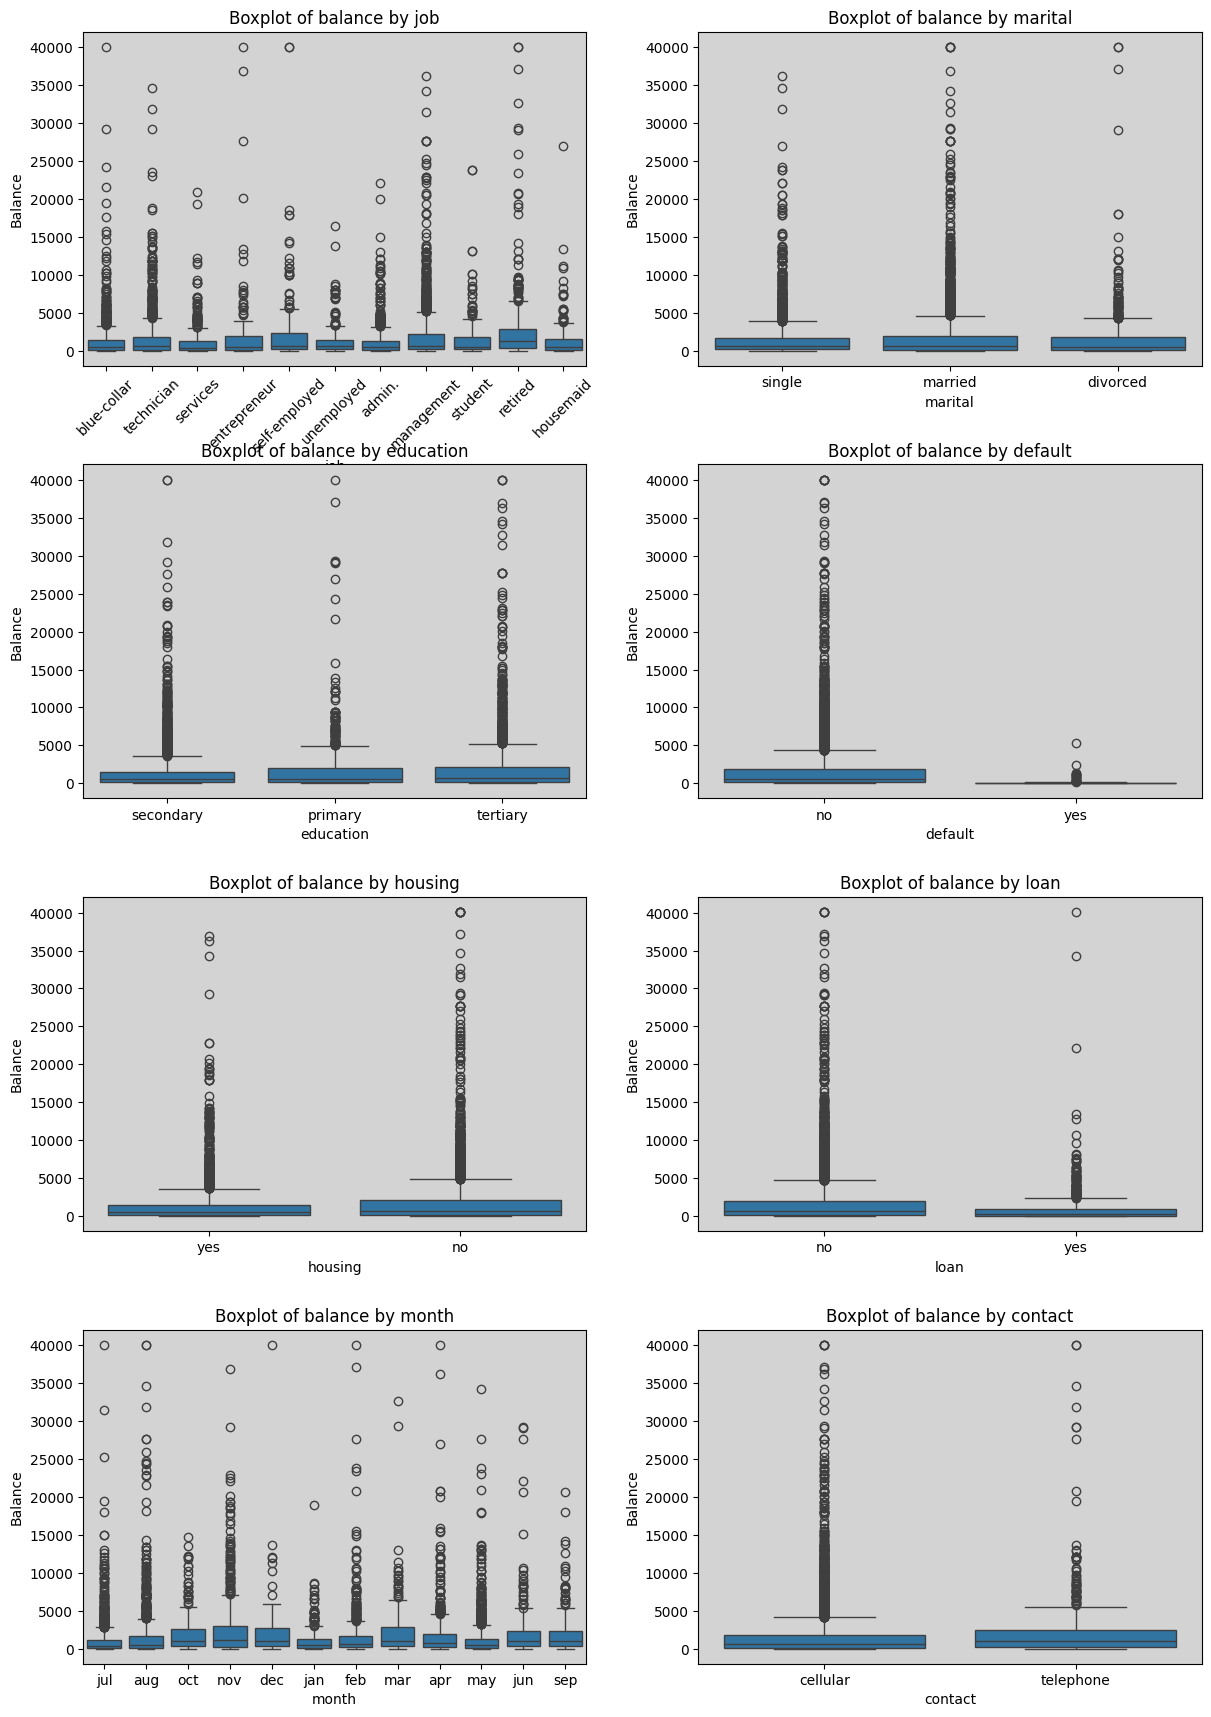

In [115]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'contact']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(13, 18))
fig.tight_layout(pad=5.0)

for ax, column in zip(axes.flatten(), categorical_columns):
    sns.boxplot(data=df, x=column, y='balance', ax=ax)
    ax.set_title(f'Boxplot of balance by {column}')
    ax.set_facecolor('lightgrey')
    ax.set_xlabel(column)
    ax.set_ylabel('Balance')
    axes[0, 0].tick_params(axis='x', rotation=45)
plt.show()

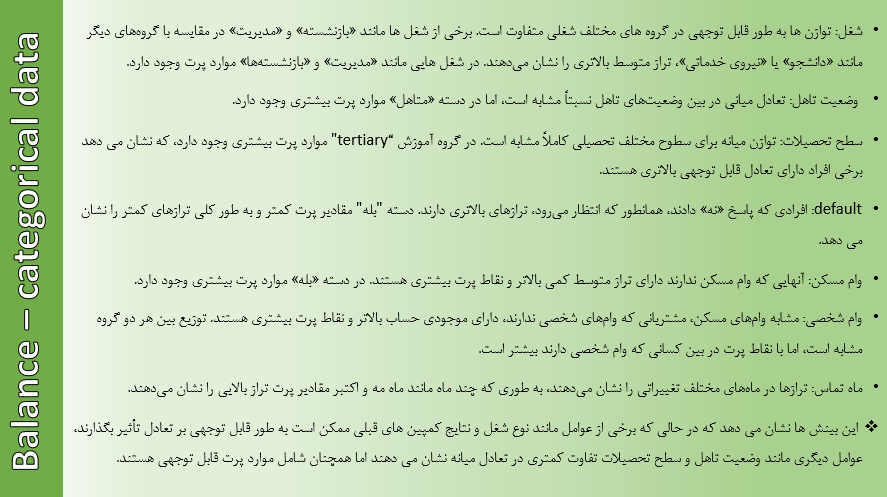

## **2.3.2) age - education - marital - job**

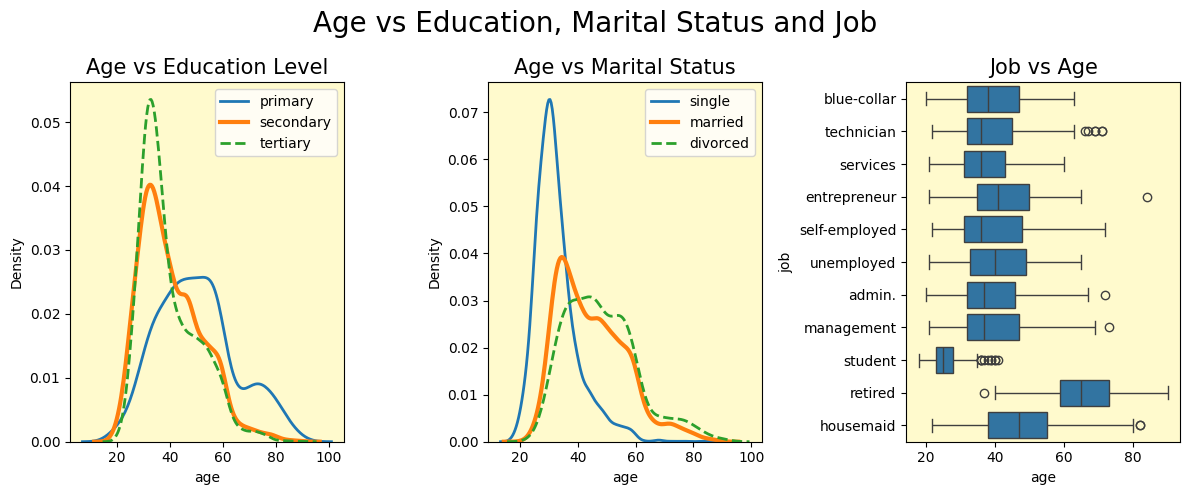

In [116]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(12,5))

ax1 = sns.distplot(df[df['education'] == 'primary']['age'],hist=False,ax=ax1,kde_kws={'linewidth':2})
ax1 = sns.distplot(df[df['education'] == 'secondary']['age'],hist=False,ax=ax1,kde_kws={'linewidth':3})
ax1 = sns.distplot(df[df['education'] == 'tertiary']['age'],hist=False,ax=ax1,kde_kws={'linestyle':'--','linewidth':2})
ax1.set_title('Age vs Education Level',fontsize=15)
ax1.legend(labels=['primary','secondary','tertiary'])
ax1.set_facecolor('lemonchiffon')

ax2 = sns.distplot(df[df['marital'] == 'single']['age'],hist=False,ax=ax2,kde_kws={'linewidth':2})
ax2 = sns.distplot(df[df['marital'] == 'married']['age'],hist=False,ax=ax2,kde_kws={'linewidth':3})
ax2 = sns.distplot(df[df['marital'] == 'divorced']['age'],hist=False,ax=ax2,kde_kws={'linestyle':'--','linewidth':2})
ax2.set_title('Age vs Marital Status',fontsize=15)
ax2.legend(labels=['single','married','divorced'])
ax2.set_facecolor('lemonchiffon')

ax3 = sns.boxplot(df,x='age',y='job',ax=ax3)
ax3.set_title("Job vs Age",fontsize=15)
ax3.set_facecolor('lemonchiffon')

fig.suptitle("Age vs Education, Marital Status and Job",fontsize=20)

plt.tight_layout()

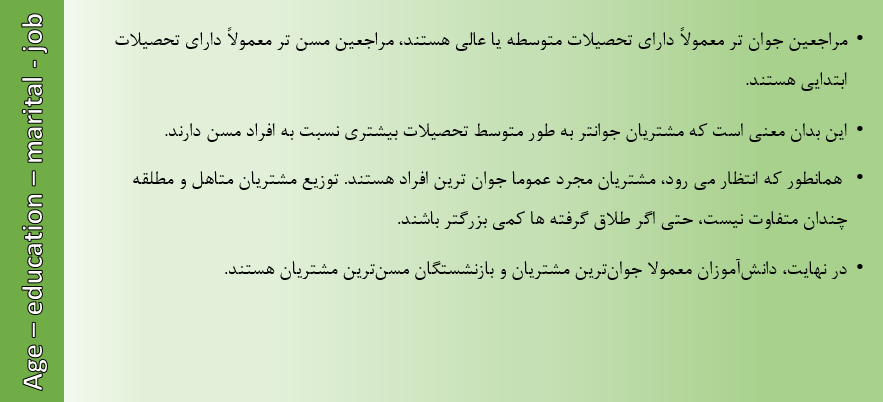

## **2.3.3) Correlation**





<Axes: >

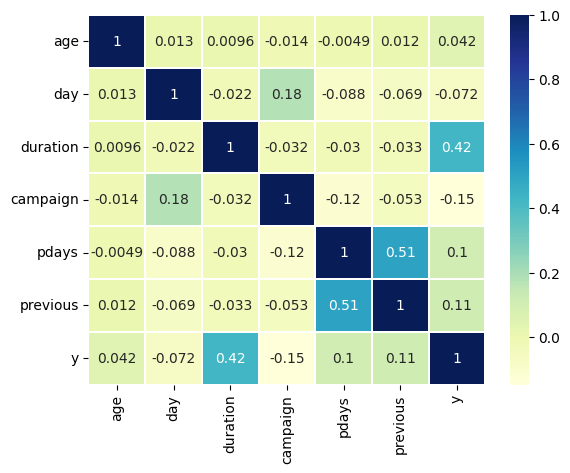

In [117]:
df_int = df.select_dtypes(include='int64')
sns.heatmap(df_int.corr(), annot=True, linewidths=0.2, linecolor='w', cmap='YlGnBu')

# 3) Pre-processing

In [118]:
df.drop(['duration'], axis=1, inplace=True)
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')

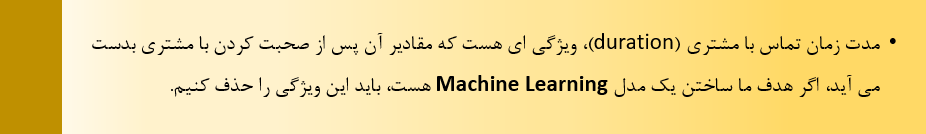

In [119]:
display(df.head())
display(df.shape)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,y
367,28,blue-collar,single,secondary,no,0.0,yes,no,cellular,4,jul,3,-1,0,1
368,55,blue-collar,married,secondary,no,49.0,yes,no,cellular,7,jul,4,-1,0,1
369,51,technician,married,secondary,no,216.0,no,no,cellular,7,jul,2,-1,0,1
370,39,technician,single,secondary,no,506.0,yes,no,cellular,7,jul,2,-1,0,1
371,42,blue-collar,divorced,primary,no,213.0,yes,no,cellular,7,jul,3,-1,0,1


(8393, 15)

In [120]:
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8393 entries, 367 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        8393 non-null   int64  
 1   job        8393 non-null   object 
 2   marital    8393 non-null   object 
 3   education  8393 non-null   object 
 4   default    8393 non-null   object 
 5   balance    8393 non-null   float64
 6   housing    8393 non-null   object 
 7   loan       8393 non-null   object 
 8   contact    8393 non-null   object 
 9   day        8393 non-null   int64  
 10  month      8393 non-null   object 
 11  campaign   8393 non-null   int64  
 12  pdays      8393 non-null   int64  
 13  previous   8393 non-null   int64  
 14  y          8393 non-null   int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 1.0+ MB


In [121]:
# -save file
df1.to_csv('bank_additional_new.csv', index=False, encoding='utf-8')

In [127]:
df_new = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bank Additional/bank_additional_new.csv')
display(df_new.head())
display(df_new.shape)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,y
0,28,blue-collar,single,secondary,no,0.0,yes,no,cellular,4,jul,3,-1,0,1
1,55,blue-collar,married,secondary,no,49.0,yes,no,cellular,7,jul,4,-1,0,1
2,51,technician,married,secondary,no,216.0,no,no,cellular,7,jul,2,-1,0,1
3,39,technician,single,secondary,no,506.0,yes,no,cellular,7,jul,2,-1,0,1
4,42,blue-collar,divorced,primary,no,213.0,yes,no,cellular,7,jul,3,-1,0,1


(8393, 15)

In [128]:
X = df_new.drop(['y'], axis=1)
y = df_new['y']
X.shape, y.shape

((8393, 14), (8393,))

In [129]:
y.value_counts()

,count
y,
1,4513
0,3880


# -job
job_mapping = {
    'student': 0,
    'unemployed': 1,
    'housemaid': 2,
    'self-employed': 3,
    'entrepreneur': 4,
    'retired': 5,
    'management': 6,
    'services': 7,
    'technician': 8,
    'blue-collar': 9,
    'admin.': 10
}


X1['job']=X1['job'].map(job_mapping)

# -marital
marital_mapipng={
    'married':2,
    'single':1,
    'divorced':0,
}
X1['marital']=X1['marital'].map(marital_mapipng)

# -education
education_mapipng={
    'primary':0,
    'secondary':1,
    'tertiary':2
}
X1['education']=X1['education'].map(education_mapipng)

# -housing
housing_mapipng={
    'yes':1,
    'no':0,
}
X1['housing']=X1['housing'].map(housing_mapipng)

# -loan
X1['loan'].replace({"no":0, "yes":1}, inplace=True)

# -conntact
X1['contact'].replace({"cellular":0, "telephone":1}, inplace=True)

# -month
month_mapping = {
    'jan':1,
    'feb':2,
    'mar':3,
    'apr':4,
    'may':5,
    'jun':6,
    'jul':7,
    'aug':8,
    'sep':9,
    'oct':10,
    'nov':11,
    'dec':12,
}

X1['month'] = X1['month'].map(month_mapping)

# -defualt
X1['default'].replace({"no":0, "yes":1}, inplace=True)

X1.info()

## 3.2) Encoding

In [130]:
from sklearn.preprocessing import LabelEncoder

In [131]:
for col in X.select_dtypes(include=object).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [132]:
print("X:")
display(X.head())

X:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous
0,28,1,2,1,0,0.0,1,0,0,4,5,3,-1,0
1,55,1,1,1,0,49.0,1,0,0,7,5,4,-1,0
2,51,9,1,1,0,216.0,0,0,0,7,5,2,-1,0
3,39,9,2,1,0,506.0,1,0,0,7,5,2,-1,0
4,42,1,0,0,0,213.0,1,0,0,7,5,3,-1,0


## 3.3) Standardization

In [133]:
from sklearn.preprocessing import  MinMaxScaler

In [134]:
scaler = MinMaxScaler()

for col in X.columns:
    X[col]=scaler.fit_transform(np.array(X[col]).reshape(-1,1))

In [135]:
print("X:")
display(X.head())

X:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous
0,0.138889,0.1,1.0,0.5,0.0,0.000000,1.0,0.0,0.0,0.1,0.454545,0.076923,0.0,0.0
1,0.513889,0.1,0.5,0.5,0.0,0.001224,1.0,0.0,0.0,0.2,0.454545,0.115385,0.0,0.0
2,0.458333,0.9,0.5,0.5,0.0,0.005394,0.0,0.0,0.0,0.2,0.454545,0.038462,0.0,0.0
3,0.291667,0.9,1.0,0.5,0.0,0.012636,1.0,0.0,0.0,0.2,0.454545,0.038462,0.0,0.0
4,0.333333,0.1,0.0,0.0,0.0,0.005319,1.0,0.0,0.0,0.2,0.454545,0.076923,0.0,0.0


## 3.1) Train Test split

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6714, 14), (6714,), (1679, 14), (1679,))

In [138]:
display(y_train.value_counts(normalize=True))
print('-'*50)
display(y_test.value_counts(normalize=True))

,proportion
y,
1,0.54364
0,0.45636


--------------------------------------------------


,proportion
y,
1,0.513996
0,0.486004


# 4) Classification Model Supervised

In [ ]:
# grid search
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# evaluation metrics
from sklearn.metrics import roc_curve, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True)
#kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam



def create_multilayer_model():
    model = Sequential()
    model.add(Dense(512, input_shape=(14,), activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


kf = KFold(n_splits=10, shuffle=True, random_state=42)

f1_scores_train = []
f1_scores_val = []


for train_index, val_index in kf.split(x_train, y_train):

    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]


    model = create_multilayer_model()


    model.fit(x_train_fold, y_train_fold,
              epochs=200,
              batch_size=32,
              verbose=0)


    y_pred_train = (model.predict(x_train_fold) > 0.5).astype("int32")
    y_pred_val = (model.predict(x_val_fold) > 0.5).astype("int32")


    f1_train = f1_score(y_train_fold, y_pred_train)
    f1_val = f1_score(y_val_fold, y_pred_val)

    f1_scores_train.append(f1_train)
    f1_scores_val.append(f1_val)


f1_scores_train_mean = np.mean(f1_scores_train)
f1_scores_val_mean = np.mean(f1_scores_val)


data = {'Model_name': ['Neural Network'],
        'F1_score_train': [f1_scores_train_mean],
        'F1_score_validation': [f1_scores_val_mean]}
result_df = pd.DataFrame(data=data)

result_df


189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
       Model_name  F1_score_train  F1_score_validation
0  Neural Network        0.987054             0.648887


## - OverFit
## - Updating ... 🔎

# logestic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
poly = PolynomialFeatures(degree=4)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [ ]:
x_train_poly.shape

(6714, 3060)

In [ ]:
logistic_regression = LogisticRegression(max_iter=5000, tol=1e-3, solver= 'liblinear', penalty= 'l2', C=0.4)
logistic_regression

LogisticRegression(C=0.4, max_iter=5000, solver='liblinear', tol=0.001)

In [ ]:
f1_scores_train = []
f1_scores_val = []

for train_index, val_index in kf.split(x_train_poly, y_train):
    x_train_fold, x_val_fold = x_train_poly[train_index], x_train_poly[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    # best model
   # logistic_regression = random_search_lgistic.best_estimator_
    logistic_regression.fit(x_train_fold, y_train_fold)
    # prediction
    y_pred_train = logistic_regression.predict(x_train_fold)
    y_pred_val = logistic_regression.predict(x_val_fold)
    # F1 score
    f1_train = f1_score(y_train_fold, y_pred_train)
    f1_val = f1_score(y_val_fold, y_pred_val)
    f1_scores_train.append(f1_train)
    f1_scores_val.append(f1_val)


# F1 score mean
f1_scores_train_logistic = np.mean(f1_scores_train)
f1_scores_val_logistic = np.mean(f1_scores_val)

data = {'Model_name': [ 'Logistic Regression'],

    'F1_score_train' : [f1_scores_train_logistic],
    'F1_score_validation' : [f1_scores_val_logistic],
       }
result_df = pd.DataFrame(data=data)
result_df

,Model_name,F1_score_train,F1_score_validation
0,Logistic Regression,0.708528,0.683136


## - Updating ... 🔎